In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import sklearn
from sklearn.metrics import mean_squared_error,r2_score
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import warnings
warnings.filterwarnings('ignore')

C:\Users\prems\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

In [3]:
dftrain = pd.read_csv("train_FD001.txt",sep='\s+',header=None,index_col=False,names=col_names)
dfvalid = pd.read_csv("test_FD001.txt",sep='\s+',header=None,index_col=False,names=col_names)
y_valid = pd.read_csv("RUL_FD001.txt",sep='\s+',header=None,index_col=False,names=['RUL'])
dfvalid.shape

(13096, 26)

In [4]:
train = dftrain.copy()
valid = dfvalid.copy()

In [5]:
train

unit_number  time_cycles  setting_1  setting_2  setting_3     s_1  \
0                1            1    -0.0007    -0.0004      100.0  518.67   
1                1            2     0.0019    -0.0003      100.0  518.67   
2                1            3    -0.0043     0.0003      100.0  518.67   
3                1            4     0.0007     0.0000      100.0  518.67   
4                1            5    -0.0019    -0.0002      100.0  518.67   
...            ...          ...        ...        ...        ...     ...   
20626          100          196    -0.0004    -0.0003      100.0  518.67   
20627          100          197    -0.0016    -0.0005      100.0  518.67   
20628          100          198     0.0004     0.0000      100.0  518.67   
20629          100          199    -0.0011     0.0003      100.0  518.67   
20630          100          200    -0.0032    -0.0005      100.0  518.67   

          s_2      s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  \
0      641.82  1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195   
1      642.15  1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318   
2      642.35  1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178   
3      642.35  1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682   
4      642.37  1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294   
...       ...      ...      ...    ...  ...     ...      ...      ...     ...   
20626  643.49  1597.98  1428.63  14.62  ...  519.49  2388.26  8137.60  8.4956   
20627  643.54  1604.50  1433.58  14.62  ...  519.68  2388.22  8136.50  8.5139   
20628  643.42  1602.46  1428.18  14.62  ...  520.01  2388.24  8141.05  8.5646   
20629  643.23  1605.26  1426.53  14.62  ...  519.67  2388.23  8139.29  8.5389   
20630  643.85  1600.38  1432.14  14.62  ...  519.30  2388.26  8137.33  8.5036   

       s_16  s_17  s_18   s_19   s_20     s_21  
0      0.03   392  2388  100.0  39.06  23.4190  
1      0.03   392  2388  100.0  39.00  23.4236  
2      0.03   390  2388  100.0  38.95  23.3442  
3      0.03   392  2388  100.0  38.88  23.3739  
4      0.03   393  2388  100.0  38.90  23.4044  
...     ...   ...   ...    ...    ...      ...  
20626  0.03   397  2388  100.0  38.49  22.9735  
20627  0.03   395  2388  100.0  38.30  23.1594  
20628  0.03   398  2388  100.0  38.44  22.9333  
20629  0.03   395  2388  100.0  38.29  23.0640  
20630  0.03   396  2388  100.0  38.37  23.0522  

[20631 rows x 26 columns]

In [6]:
valid

unit_number  time_cycles  setting_1  setting_2  setting_3     s_1  \
0                1            1     0.0023     0.0003      100.0  518.67   
1                1            2    -0.0027    -0.0003      100.0  518.67   
2                1            3     0.0003     0.0001      100.0  518.67   
3                1            4     0.0042     0.0000      100.0  518.67   
4                1            5     0.0014     0.0000      100.0  518.67   
...            ...          ...        ...        ...        ...     ...   
13091          100          194     0.0049     0.0000      100.0  518.67   
13092          100          195    -0.0011    -0.0001      100.0  518.67   
13093          100          196    -0.0006    -0.0003      100.0  518.67   
13094          100          197    -0.0038     0.0001      100.0  518.67   
13095          100          198     0.0013     0.0003      100.0  518.67   

          s_2      s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  \
0      643.02  1585.29  1398.21  14.62  ...  521.72  2388.03  8125.55  8.4052   
1      641.71  1588.45  1395.42  14.62  ...  522.16  2388.06  8139.62  8.3803   
2      642.46  1586.94  1401.34  14.62  ...  521.97  2388.03  8130.10  8.4441   
3      642.44  1584.12  1406.42  14.62  ...  521.38  2388.05  8132.90  8.3917   
4      642.51  1587.19  1401.92  14.62  ...  522.15  2388.03  8129.54  8.4031   
...       ...      ...      ...    ...  ...     ...      ...      ...     ...   
13091  643.24  1599.45  1415.79  14.62  ...  520.69  2388.00  8213.28  8.4715   
13092  643.22  1595.69  1422.05  14.62  ...  521.05  2388.09  8210.85  8.4512   
13093  643.44  1593.15  1406.82  14.62  ...  521.18  2388.04  8217.24  8.4569   
13094  643.26  1594.99  1419.36  14.62  ...  521.33  2388.08  8220.48  8.4711   
13095  642.95  1601.62  1424.99  14.62  ...  521.07  2388.05  8214.64  8.4903   

       s_16  s_17  s_18   s_19   s_20     s_21  
0      0.03   392  2388  100.0  38.86  23.3735  
1      0.03   393  2388  100.0  39.02  23.3916  
2      0.03   393  2388  100.0  39.08  23.4166  
3      0.03   391  2388  100.0  39.00  23.3737  
4      0.03   390  2388  100.0  38.99  23.4130  
...     ...   ...   ...    ...    ...      ...  
13091  0.03   394  2388  100.0  38.65  23.1974  
13092  0.03   395  2388  100.0  38.57  23.2771  
13093  0.03   395  2388  100.0  38.62  23.2051  
13094  0.03   395  2388  100.0  38.66  23.2699  
13095  0.03   396  2388  100.0  38.70  23.1855  

[13096 rows x 26 columns]

In [7]:
print('Shape of the train dataset : ',train.shape)
print('Shape of the validation dataset : ',valid.shape)
print('Percentage of the validation dataset : ',len(valid)/(len(valid)+len(train)))

Shape of the train dataset :  (20631, 26)
Shape of the validation dataset :  (13096, 26)
Percentage of the validation dataset :  0.3882942449669404


In [8]:
train.isnull().sum() 

unit_number    0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
s_1            0
s_2            0
s_3            0
s_4            0
s_5            0
s_6            0
s_7            0
s_8            0
s_9            0
s_10           0
s_11           0
s_12           0
s_13           0
s_14           0
s_15           0
s_16           0
s_17           0
s_18           0
s_19           0
s_20           0
s_21           0
dtype: int64

In [9]:
valid.isnull().sum()

unit_number    0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
s_1            0
s_2            0
s_3            0
s_4            0
s_5            0
s_6            0
s_7            0
s_8            0
s_9            0
s_10           0
s_11           0
s_12           0
s_13           0
s_14           0
s_15           0
s_16           0
s_17           0
s_18           0
s_19           0
s_20           0
s_21           0
dtype: int64

In [10]:
train.describe()

unit_number   time_cycles     setting_1     setting_2  setting_3  \
count  20631.000000  20631.000000  20631.000000  20631.000000    20631.0   
mean      51.506568    108.807862     -0.000009      0.000002      100.0   
std       29.227633     68.880990      0.002187      0.000293        0.0   
min        1.000000      1.000000     -0.008700     -0.000600      100.0   
25%       26.000000     52.000000     -0.001500     -0.000200      100.0   
50%       52.000000    104.000000      0.000000      0.000000      100.0   
75%       77.000000    156.000000      0.001500      0.000300      100.0   
max      100.000000    362.000000      0.008700      0.000600      100.0   

                s_1           s_2           s_3           s_4           s_5  \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean   5.186700e+02    642.680934   1590.523119   1408.933782  1.462000e+01   
std    6.537152e-11      0.500053      6.131150      9.000605  3.394700e-12   
min    5.186700e+02    641.210000   1571.040000   1382.250000  1.462000e+01   
25%    5.186700e+02    642.325000   1586.260000   1402.360000  1.462000e+01   
50%    5.186700e+02    642.640000   1590.100000   1408.040000  1.462000e+01   
75%    5.186700e+02    643.000000   1594.380000   1414.555000  1.462000e+01   
max    5.186700e+02    644.530000   1616.910000   1441.490000  1.462000e+01   

       ...          s_12          s_13          s_14          s_15  \
count  ...  20631.000000  20631.000000  20631.000000  20631.000000   
mean   ...    521.413470   2388.096152   8143.752722      8.442146   
std    ...      0.737553      0.071919     19.076176      0.037505   
min    ...    518.690000   2387.880000   8099.940000      8.324900   
25%    ...    520.960000   2388.040000   8133.245000      8.414900   
50%    ...    521.480000   2388.090000   8140.540000      8.438900   
75%    ...    521.950000   2388.140000   8148.310000      8.465600   
max    ...    523.380000   2388.560000   8293.720000      8.584800   

               s_16          s_17     s_18     s_19          s_20  \
count  2.063100e+04  20631.000000  20631.0  20631.0  20631.000000   
mean   3.000000e-02    393.210654   2388.0    100.0     38.816271   
std    1.556432e-14      1.548763      0.0      0.0      0.180746   
min    3.000000e-02    388.000000   2388.0    100.0     38.140000   
25%    3.000000e-02    392.000000   2388.0    100.0     38.700000   
50%    3.000000e-02    393.000000   2388.0    100.0     38.830000   
75%    3.000000e-02    394.000000   2388.0    100.0     38.950000   
max    3.000000e-02    400.000000   2388.0    100.0     39.430000   

               s_21  
count  20631.000000  
mean      23.289705  
std        0.108251  
min       22.894200  
25%       23.221800  
50%       23.297900  
75%       23.366800  
max       23.618400  

[8 rows x 26 columns]

In [11]:
valid.describe()

unit_number   time_cycles     setting_1     setting_2  setting_3  \
count  13096.000000  13096.000000  13096.000000  13096.000000    13096.0   
mean      51.543907     76.836515     -0.000011      0.000004      100.0   
std       28.289423     53.057749      0.002203      0.000294        0.0   
min        1.000000      1.000000     -0.008200     -0.000600      100.0   
25%       28.000000     33.000000     -0.001500     -0.000200      100.0   
50%       52.000000     69.000000     -0.000000     -0.000000      100.0   
75%       76.000000    113.000000      0.001500      0.000300      100.0   
max      100.000000    303.000000      0.007800      0.000700      100.0   

                s_1           s_2           s_3           s_4           s_5  \
count  1.309600e+04  13096.000000  13096.000000  13096.000000  1.309600e+04   
mean   5.186700e+02    642.475088   1588.099204   1404.735362  1.462000e+01   
std    6.014263e-11      0.400899      5.003274      6.688309  2.671743e-12   
min    5.186700e+02    641.130000   1569.040000   1384.390000  1.462000e+01   
25%    5.186700e+02    642.197500   1584.600000   1399.950000  1.462000e+01   
50%    5.186700e+02    642.460000   1587.990000   1404.440000  1.462000e+01   
75%    5.186700e+02    642.740000   1591.362500   1409.050000  1.462000e+01   
max    5.186700e+02    644.300000   1607.550000   1433.360000  1.462000e+01   

       ...          s_12          s_13          s_14          s_15  \
count  ...  13096.000000  13096.000000  13096.000000  13096.000000   
mean   ...    521.747724   2388.071025   8138.947817      8.425844   
std    ...      0.559627      0.056934     10.188605      0.029009   
min    ...    519.380000   2387.890000   8108.500000      8.332800   
25%    ...    521.380000   2388.030000   8132.310000      8.405600   
50%    ...    521.780000   2388.070000   8138.390000      8.424900   
75%    ...    522.150000   2388.110000   8144.360000      8.444300   
max    ...    523.760000   2388.320000   8220.480000      8.541400   

               s_16          s_17     s_18     s_19          s_20  \
count  1.309600e+04  13096.000000  13096.0  13096.0  13096.000000   
mean   3.000000e-02    392.571625   2388.0    100.0     38.892502   
std    8.823140e-15      1.233577      0.0      0.0      0.141681   
min    3.000000e-02    389.000000   2388.0    100.0     38.310000   
25%    3.000000e-02    392.000000   2388.0    100.0     38.800000   
50%    3.000000e-02    393.000000   2388.0    100.0     38.900000   
75%    3.000000e-02    393.000000   2388.0    100.0     38.990000   
max    3.000000e-02    397.000000   2388.0    100.0     39.410000   

               s_21  
count  13096.000000  
mean      23.335743  
std        0.084120  
min       22.935400  
25%       23.281600  
50%       23.339200  
75%       23.393600  
max       23.641900  

[8 rows x 26 columns]

In [12]:
train.loc[:,['unit_number','time_cycles']].describe()

unit_number   time_cycles
count  20631.000000  20631.000000
mean      51.506568    108.807862
std       29.227633     68.880990
min        1.000000      1.000000
25%       26.000000     52.000000
50%       52.000000    104.000000
75%       77.000000    156.000000
max      100.000000    362.000000

In [13]:
train.loc[:,'s_1':].describe().transpose()

count         mean           std        min        25%        50%  \
s_1   20631.0   518.670000  6.537152e-11   518.6700   518.6700   518.6700   
s_2   20631.0   642.680934  5.000533e-01   641.2100   642.3250   642.6400   
s_3   20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600  1590.1000   
s_4   20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600  1408.0400   
s_5   20631.0    14.620000  3.394700e-12    14.6200    14.6200    14.6200   
s_6   20631.0    21.609803  1.388985e-03    21.6000    21.6100    21.6100   
s_7   20631.0   553.367711  8.850923e-01   549.8500   552.8100   553.4400   
s_8   20631.0  2388.096652  7.098548e-02  2387.9000  2388.0500  2388.0900   
s_9   20631.0  9065.242941  2.208288e+01  9021.7300  9053.1000  9060.6600   
s_10  20631.0     1.300000  4.660829e-13     1.3000     1.3000     1.3000   
s_11  20631.0    47.541168  2.670874e-01    46.8500    47.3500    47.5100   
s_12  20631.0   521.413470  7.375534e-01   518.6900   520.9600   521.4800   
s_13  20631.0  2388.096152  7.191892e-02  2387.8800  2388.0400  2388.0900   
s_14  20631.0  8143.752722  1.907618e+01  8099.9400  8133.2450  8140.5400   
s_15  20631.0     8.442146  3.750504e-02     8.3249     8.4149     8.4389   
s_16  20631.0     0.030000  1.556432e-14     0.0300     0.0300     0.0300   
s_17  20631.0   393.210654  1.548763e+00   388.0000   392.0000   393.0000   
s_18  20631.0  2388.000000  0.000000e+00  2388.0000  2388.0000  2388.0000   
s_19  20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
s_20  20631.0    38.816271  1.807464e-01    38.1400    38.7000    38.8300   
s_21  20631.0    23.289705  1.082509e-01    22.8942    23.2218    23.2979   

            75%        max  
s_1    518.6700   518.6700  
s_2    643.0000   644.5300  
s_3   1594.3800  1616.9100  
s_4   1414.5550  1441.4900  
s_5     14.6200    14.6200  
s_6     21.6100    21.6100  
s_7    554.0100   556.0600  
s_8   2388.1400  2388.5600  
s_9   9069.4200  9244.5900  
s_10     1.3000     1.3000  
s_11    47.7000    48.5300  
s_12   521.9500   523.3800  
s_13  2388.1400  2388.5600  
s_14  8148.3100  8293.7200  
s_15     8.4656     8.5848  
s_16     0.0300     0.0300  
s_17   394.0000   400.0000  
s_18  2388.0000  2388.0000  
s_19   100.0000   100.0000  
s_20    38.9500    39.4300  
s_21    23.3668    23.6184

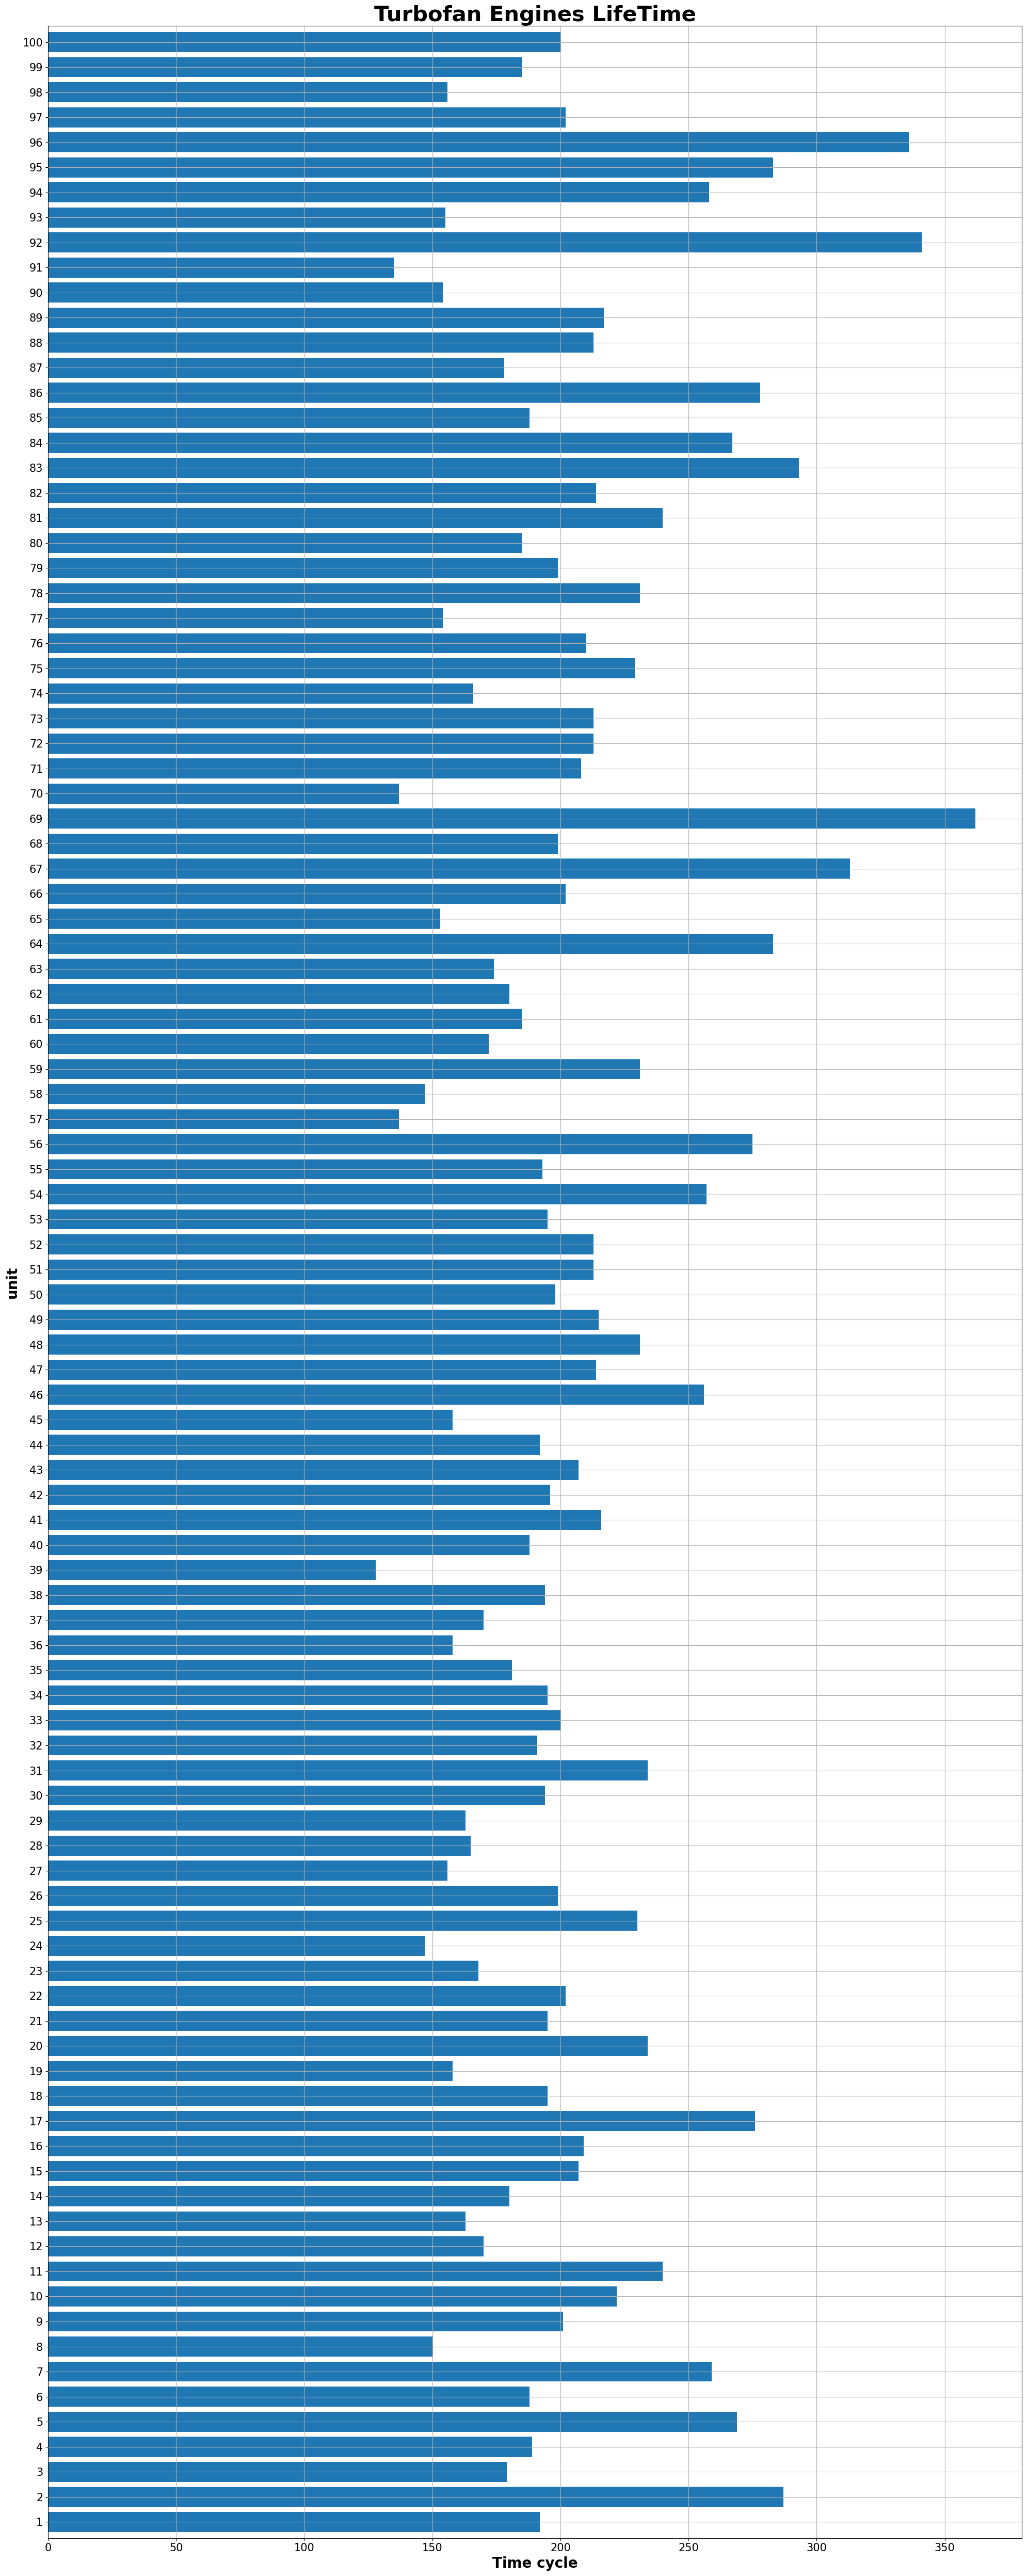

In [14]:
max_time_cycles=train[index_names].groupby('unit_number').max()
plt.figure(figsize=(20,50))
ax=max_time_cycles['time_cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 9.444444444444459, 'max time cycle')

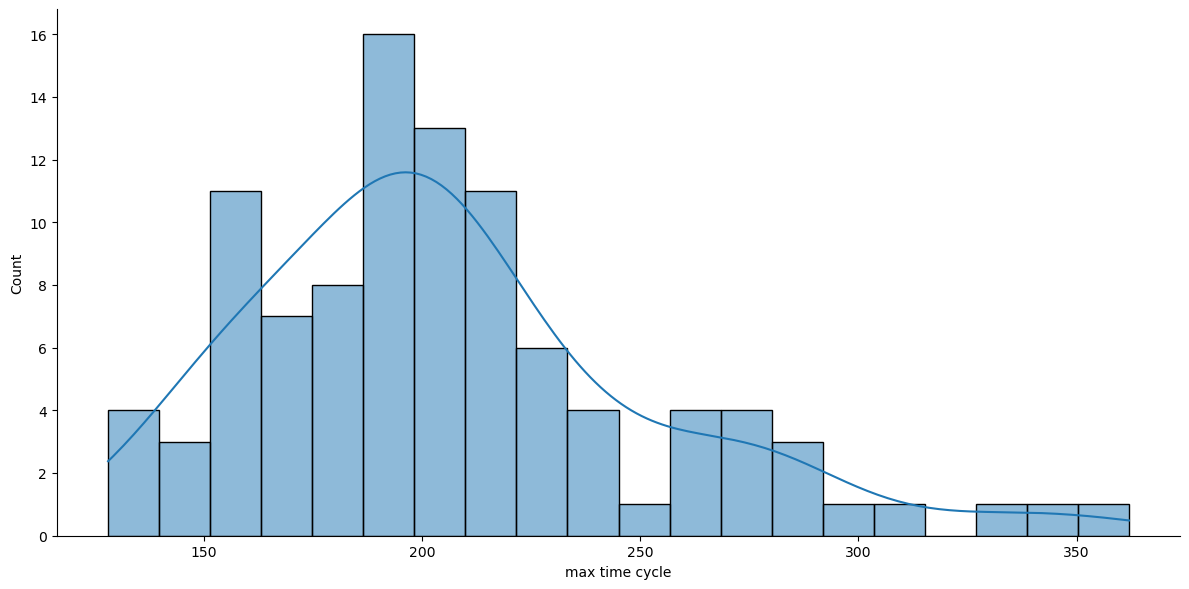

In [15]:
sns.displot(max_time_cycles['time_cycles'],kde=True,bins=20,height=6,aspect=2)
plt.xlabel('max time cycle')

In [16]:
def add_RUL_column(df):
    train_grouped_by_unit = df.groupby(by='unit_number') 
    max_time_cycles = train_grouped_by_unit['time_cycles'].max() 
    merged = df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
    merged = merged.drop("max_time_cycle", axis=1) 
    return merged

In [17]:
train = add_RUL_column(train)

In [18]:
train

unit_number  time_cycles  setting_1  setting_2  setting_3     s_1  \
0                1            1    -0.0007    -0.0004      100.0  518.67   
1                1            2     0.0019    -0.0003      100.0  518.67   
2                1            3    -0.0043     0.0003      100.0  518.67   
3                1            4     0.0007     0.0000      100.0  518.67   
4                1            5    -0.0019    -0.0002      100.0  518.67   
...            ...          ...        ...        ...        ...     ...   
20626          100          196    -0.0004    -0.0003      100.0  518.67   
20627          100          197    -0.0016    -0.0005      100.0  518.67   
20628          100          198     0.0004     0.0000      100.0  518.67   
20629          100          199    -0.0011     0.0003      100.0  518.67   
20630          100          200    -0.0032    -0.0005      100.0  518.67   

          s_2      s_3      s_4    s_5  ...     s_13     s_14    s_15  s_16  \
0      641.82  1589.70  1400.60  14.62  ...  2388.02  8138.62  8.4195  0.03   
1      642.15  1591.82  1403.14  14.62  ...  2388.07  8131.49  8.4318  0.03   
2      642.35  1587.99  1404.20  14.62  ...  2388.03  8133.23  8.4178  0.03   
3      642.35  1582.79  1401.87  14.62  ...  2388.08  8133.83  8.3682  0.03   
4      642.37  1582.85  1406.22  14.62  ...  2388.04  8133.80  8.4294  0.03   
...       ...      ...      ...    ...  ...      ...      ...     ...   ...   
20626  643.49  1597.98  1428.63  14.62  ...  2388.26  8137.60  8.4956  0.03   
20627  643.54  1604.50  1433.58  14.62  ...  2388.22  8136.50  8.5139  0.03   
20628  643.42  1602.46  1428.18  14.62  ...  2388.24  8141.05  8.5646  0.03   
20629  643.23  1605.26  1426.53  14.62  ...  2388.23  8139.29  8.5389  0.03   
20630  643.85  1600.38  1432.14  14.62  ...  2388.26  8137.33  8.5036  0.03   

       s_17  s_18   s_19   s_20     s_21  RUL  
0       392  2388  100.0  39.06  23.4190  191  
1       392  2388  100.0  39.00  23.4236  190  
2       390  2388  100.0  38.95  23.3442  189  
3       392  2388  100.0  38.88  23.3739  188  
4       393  2388  100.0  38.90  23.4044  187  
...     ...   ...    ...    ...      ...  ...  
20626   397  2388  100.0  38.49  22.9735    4  
20627   395  2388  100.0  38.30  23.1594    3  
20628   398  2388  100.0  38.44  22.9333    2  
20629   395  2388  100.0  38.29  23.0640    1  
20630   396  2388  100.0  38.37  23.0522    0  

[20631 rows x 27 columns]

In [19]:
train[['unit_number','RUL']]

unit_number  RUL
0                1  191
1                1  190
2                1  189
3                1  188
4                1  187
...            ...  ...
20626          100    4
20627          100    3
20628          100    2
20629          100    1
20630          100    0

[20631 rows x 2 columns]

In [20]:
maxrul_u = train.groupby('unit_number').max().reset_index()
maxrul_u.head()

unit_number  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0            1          192     0.0047     0.0005      100.0  518.67  644.21   
1            2          287     0.0076     0.0006      100.0  518.67  643.94   
2            3          179     0.0058     0.0005      100.0  518.67  643.93   
3            4          189     0.0059     0.0006      100.0  518.67  644.53   
4            5          269     0.0055     0.0005      100.0  518.67  644.02   

       s_3      s_4    s_5  ...     s_13     s_14    s_15  s_16  s_17  s_18  \
0  1605.44  1432.52  14.62  ...  2388.35  8140.58  8.5227  0.03   398  2388   
1  1610.10  1431.17  14.62  ...  2388.26  8175.57  8.5377  0.03   398  2388   
2  1606.50  1438.51  14.62  ...  2388.20  8255.34  8.5363  0.03   399  2388   
3  1612.11  1434.12  14.62  ...  2388.17  8259.42  8.5462  0.03   399  2388   
4  1609.41  1434.59  14.62  ...  2388.23  8215.19  8.5410  0.03   398  2388   

    s_19   s_20     s_21  RUL  
0  100.0  39.18  23.4999  191  
1  100.0  39.24  23.6005  286  
2  100.0  39.23  23.5181  178  
3  100.0  39.21  23.5074  188  
4  100.0  39.29  23.5503  268  

[5 rows x 27 columns]

In [21]:
train.isna().sum()

unit_number    0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
s_1            0
s_2            0
s_3            0
s_4            0
s_5            0
s_6            0
s_7            0
s_8            0
s_9            0
s_10           0
s_11           0
s_12           0
s_13           0
s_14           0
s_15           0
s_16           0
s_17           0
s_18           0
s_19           0
s_20           0
s_21           0
RUL            0
dtype: int64

In [22]:
maxrul_u = train.groupby('unit_number').max().reset_index()
maxrul_u

unit_number  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0             1          192     0.0047     0.0005      100.0  518.67  644.21   
1             2          287     0.0076     0.0006      100.0  518.67  643.94   
2             3          179     0.0058     0.0005      100.0  518.67  643.93   
3             4          189     0.0059     0.0006      100.0  518.67  644.53   
4             5          269     0.0055     0.0005      100.0  518.67  644.02   
..          ...          ...        ...        ...        ...     ...     ...   
95           96          336     0.0049     0.0005      100.0  518.67  644.20   
96           97          202     0.0050     0.0006      100.0  518.67  643.97   
97           98          156     0.0077     0.0004      100.0  518.67  644.39   
98           99          185     0.0059     0.0005      100.0  518.67  644.10   
99          100          200     0.0056     0.0004      100.0  518.67  643.95   

        s_3      s_4    s_5  ...     s_13     s_14    s_15  s_16  s_17  s_18  \
0   1605.44  1432.52  14.62  ...  2388.35  8140.58  8.5227  0.03   398  2388   
1   1610.10  1431.17  14.62  ...  2388.26  8175.57  8.5377  0.03   398  2388   
2   1606.50  1438.51  14.62  ...  2388.20  8255.34  8.5363  0.03   399  2388   
3   1612.11  1434.12  14.62  ...  2388.17  8259.42  8.5462  0.03   399  2388   
4   1609.41  1434.59  14.62  ...  2388.23  8215.19  8.5410  0.03   398  2388   
..      ...      ...    ...  ...      ...      ...     ...   ...   ...   ...   
95  1608.62  1432.65  14.62  ...  2388.28  8146.04  8.5615  0.03   398  2388   
96  1610.66  1430.66  14.62  ...  2388.17  8270.91  8.5596  0.03   400  2388   
97  1606.24  1432.16  14.62  ...  2388.30  8156.01  8.5308  0.03   396  2388   
98  1616.91  1436.54  14.62  ...  2388.33  8145.61  8.5592  0.03   397  2388   
99  1610.87  1433.58  14.62  ...  2388.28  8150.68  8.5646  0.03   398  2388   

     s_19   s_20     s_21  RUL  
0   100.0  39.18  23.4999  191  
1   100.0  39.24  23.6005  286  
2   100.0  39.23  23.5181  178  
3   100.0  39.21  23.5074  188  
4   100.0  39.29  23.5503  268  
..    ...    ...      ...  ...  
95  100.0  39.18  23.5344  335  
96  100.0  39.22  23.5181  201  
97  100.0  39.30  23.5461  155  
98  100.0  39.20  23.4986  184  
99  100.0  39.18  23.5751  199  

[100 rows x 27 columns]

In [23]:
train_grouped_by_unit = train.groupby(by='unit_number') 
max_time_cycles = train_grouped_by_unit['time_cycles'].max()
max_time_cycles

unit_number
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: time_cycles, Length: 100, dtype: int64

In [24]:
merged = train.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)

In [25]:
merged

unit_number  time_cycles  setting_1  setting_2  setting_3     s_1  \
0                1            1    -0.0007    -0.0004      100.0  518.67   
1                1            2     0.0019    -0.0003      100.0  518.67   
2                1            3    -0.0043     0.0003      100.0  518.67   
3                1            4     0.0007     0.0000      100.0  518.67   
4                1            5    -0.0019    -0.0002      100.0  518.67   
...            ...          ...        ...        ...        ...     ...   
20626          100          196    -0.0004    -0.0003      100.0  518.67   
20627          100          197    -0.0016    -0.0005      100.0  518.67   
20628          100          198     0.0004     0.0000      100.0  518.67   
20629          100          199    -0.0011     0.0003      100.0  518.67   
20630          100          200    -0.0032    -0.0005      100.0  518.67   

          s_2      s_3      s_4    s_5  ...     s_14    s_15  s_16  s_17  \
0      641.82  1589.70  1400.60  14.62  ...  8138.62  8.4195  0.03   392   
1      642.15  1591.82  1403.14  14.62  ...  8131.49  8.4318  0.03   392   
2      642.35  1587.99  1404.20  14.62  ...  8133.23  8.4178  0.03   390   
3      642.35  1582.79  1401.87  14.62  ...  8133.83  8.3682  0.03   392   
4      642.37  1582.85  1406.22  14.62  ...  8133.80  8.4294  0.03   393   
...       ...      ...      ...    ...  ...      ...     ...   ...   ...   
20626  643.49  1597.98  1428.63  14.62  ...  8137.60  8.4956  0.03   397   
20627  643.54  1604.50  1433.58  14.62  ...  8136.50  8.5139  0.03   395   
20628  643.42  1602.46  1428.18  14.62  ...  8141.05  8.5646  0.03   398   
20629  643.23  1605.26  1426.53  14.62  ...  8139.29  8.5389  0.03   395   
20630  643.85  1600.38  1432.14  14.62  ...  8137.33  8.5036  0.03   396   

       s_18   s_19   s_20     s_21  RUL  max_time_cycle  
0      2388  100.0  39.06  23.4190  191             192  
1      2388  100.0  39.00  23.4236  190             192  
2      2388  100.0  38.95  23.3442  189             192  
3      2388  100.0  38.88  23.3739  188             192  
4      2388  100.0  38.90  23.4044  187             192  
...     ...    ...    ...      ...  ...             ...  
20626  2388  100.0  38.49  22.9735    4             200  
20627  2388  100.0  38.30  23.1594    3             200  
20628  2388  100.0  38.44  22.9333    2             200  
20629  2388  100.0  38.29  23.0640    1             200  
20630  2388  100.0  38.37  23.0522    0             200  

[20631 rows x 28 columns]

[]

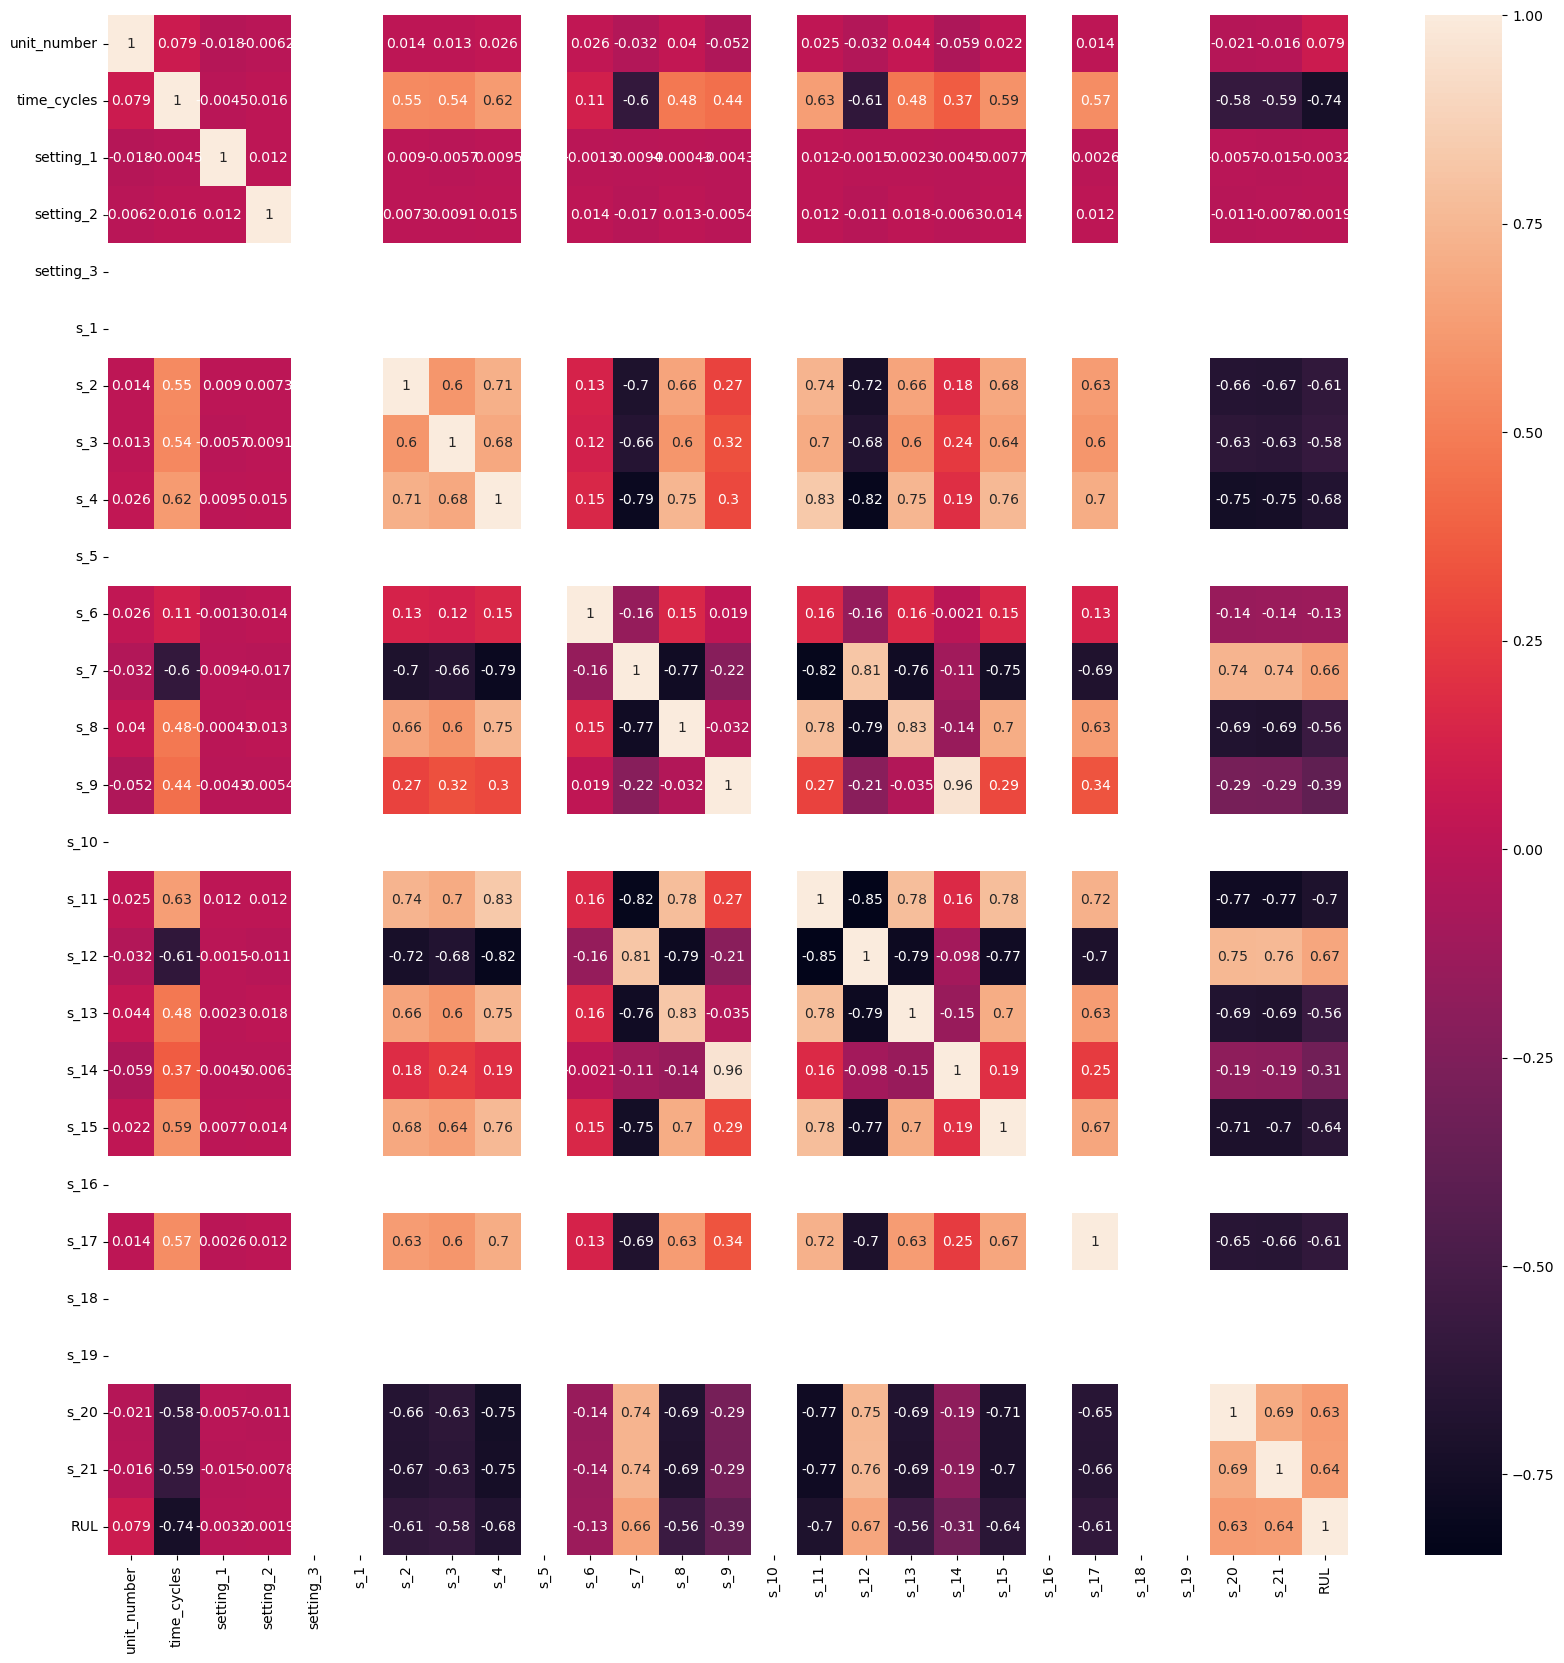

In [26]:
corr = train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.plot()

In [27]:
Sensor_dictionary={}
dict_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
i=1
for x in dict_list :
    Sensor_dictionary['s_'+str(i)]=x
    i+=1
Sensor_dictionary

{'s_1': '(Fan inlet temperature) (◦R)',
 's_2': '(LPC outlet temperature) (◦R)',
 's_3': '(HPC outlet temperature) (◦R)',
 's_4': '(LPT outlet temperature) (◦R)',
 's_5': '(Fan inlet Pressure) (psia)',
 's_6': '(bypass-duct pressure) (psia)',
 's_7': '(HPC outlet pressure) (psia)',
 's_8': '(Physical fan speed) (rpm)',
 's_9': '(Physical core speed) (rpm)',
 's_10': '(Engine pressure ratio(P50/P2)',
 's_11': '(HPC outlet Static pressure) (psia)',
 's_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 's_13': '(Corrected fan speed) (rpm)',
 's_14': '(Corrected core speed) (rpm)',
 's_15': '(Bypass Ratio) ',
 's_16': '(Burner fuel-air ratio)',
 's_17': '(Bleed Enthalpy)',
 's_18': '(Required fan speed)',
 's_19': '(Required fan conversion speed)',
 's_20': '(High-pressure turbines Cool air flow)',
 's_21': '(Low-pressure turbines Cool air flow)'}

In [28]:
def plot_signal(df, Sensor_dic, signal_name):
    plt.figure(figsize=(13,5))
    for i in df['unit_number'].unique():
        if (i % 10 == 0): 
            plt.plot('RUL', signal_name, data=df[df['unit_number']==i].rolling(10).mean())
    #rolling mean for window size
    plt.xlim(250, 0) 
    plt.xticks(np.arange(0, 300, 25))
    plt.ylabel(Sensor_dic[signal_name])
    plt.xlabel('Remaining Useful Life')
    plt.show()


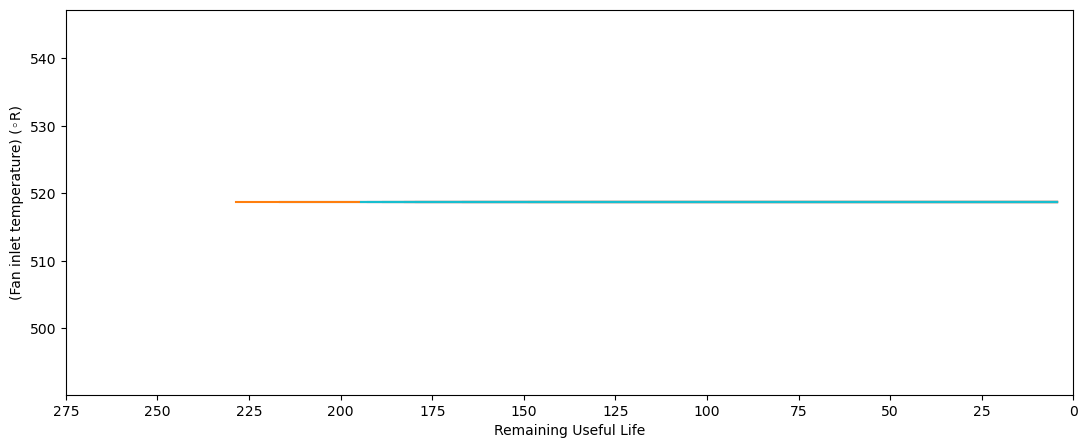

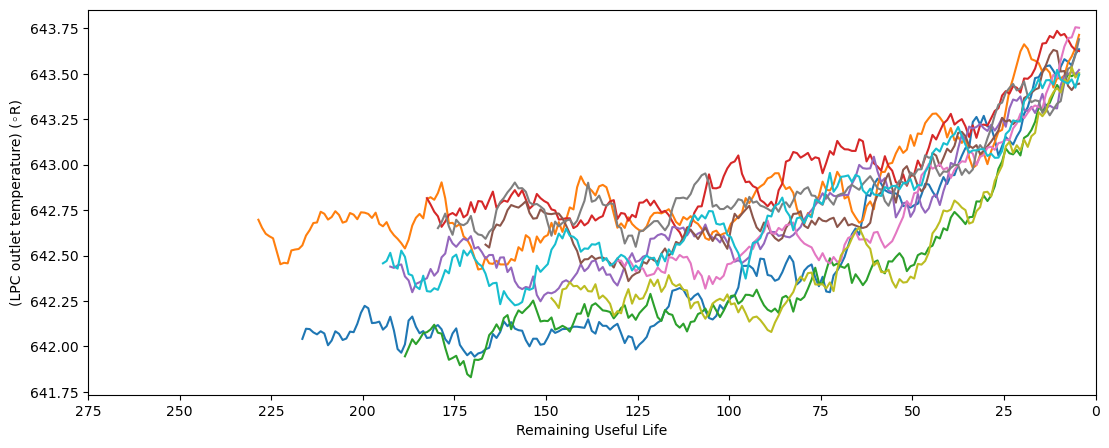

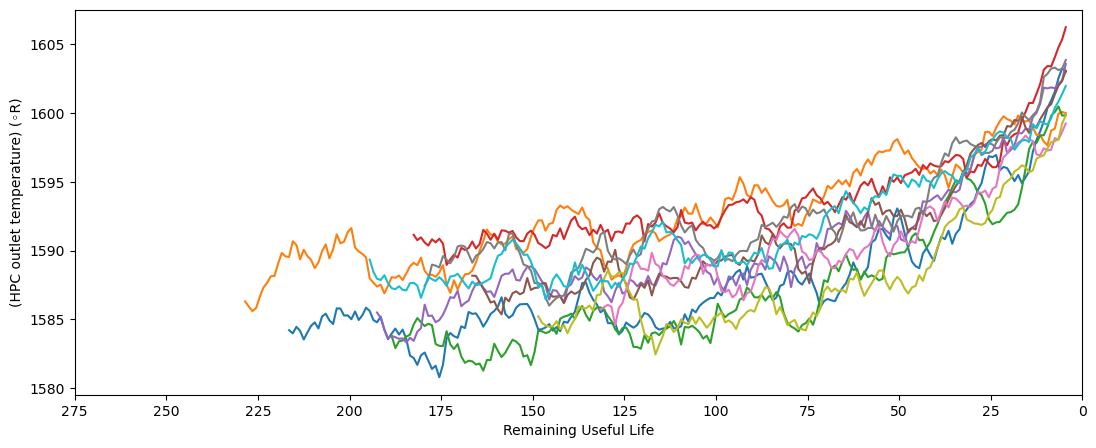

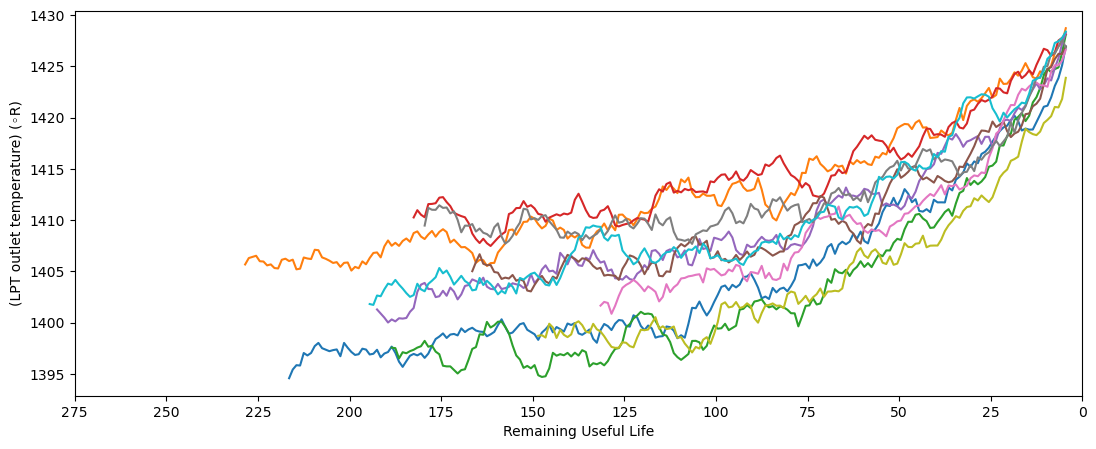

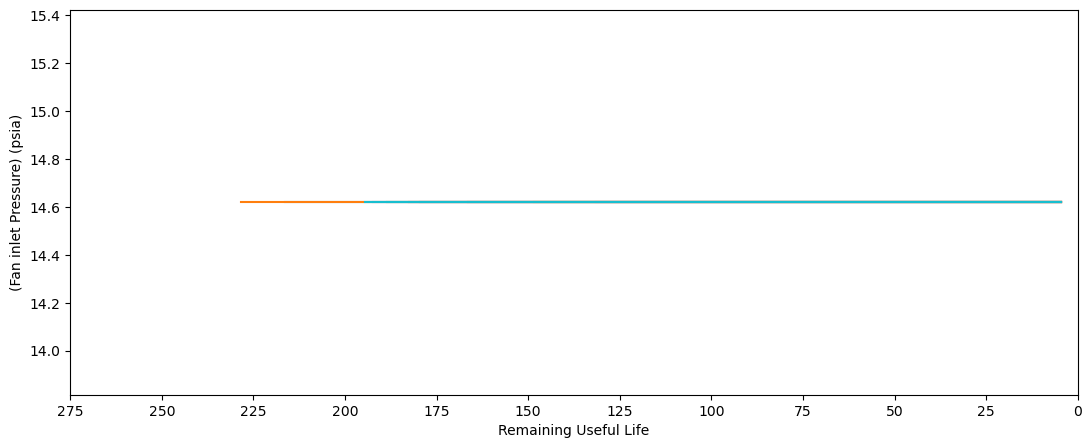

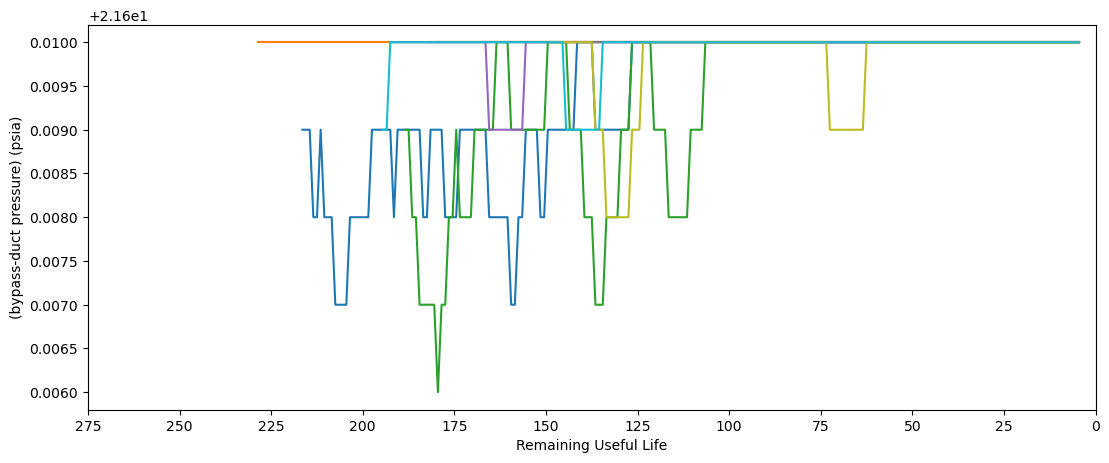

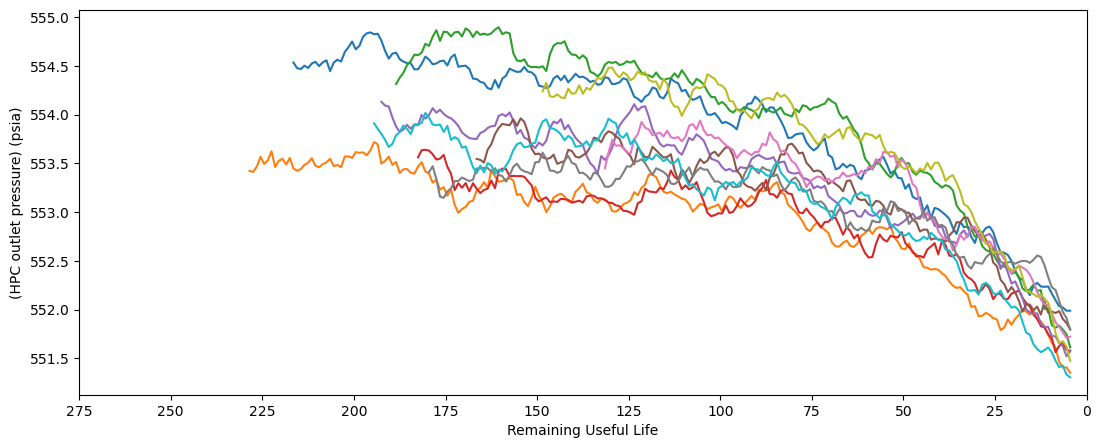

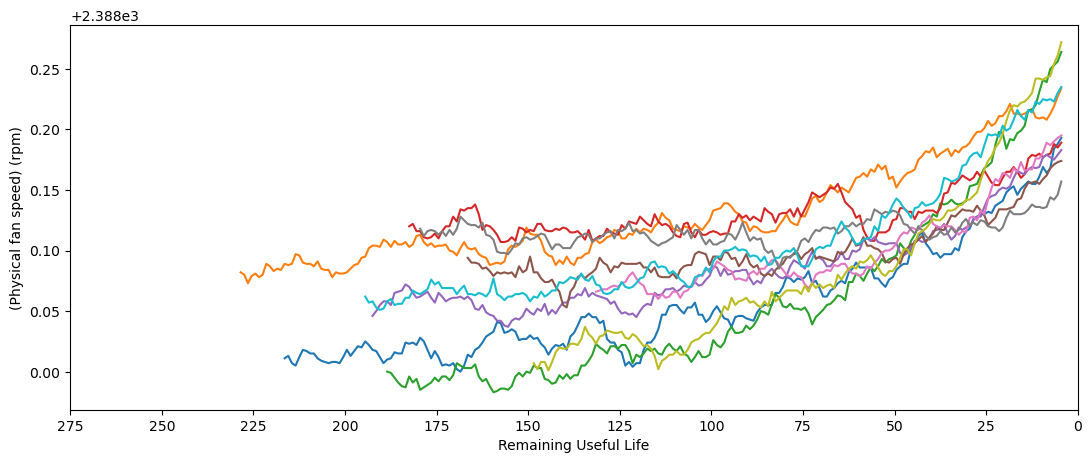

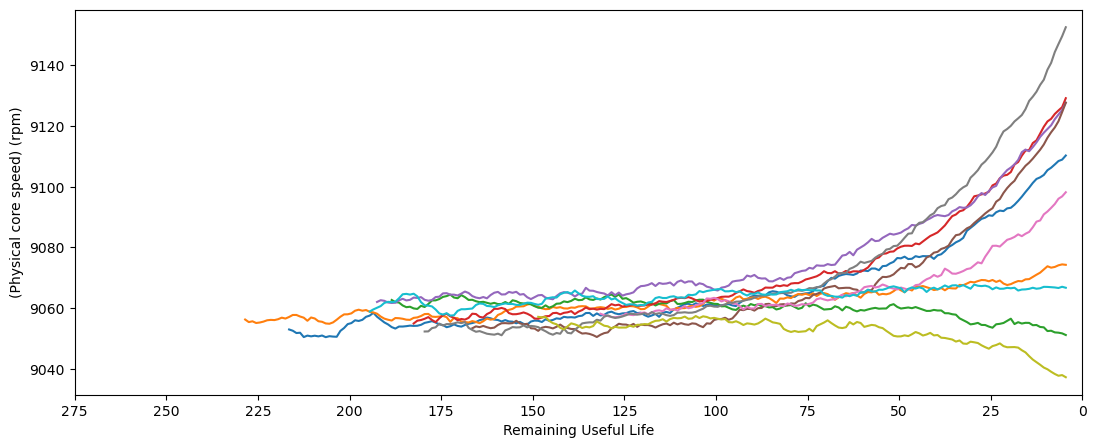

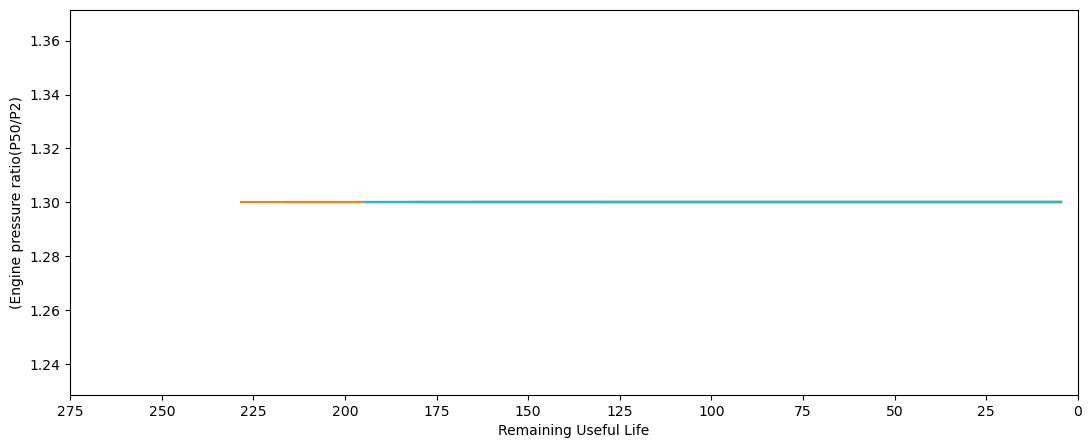

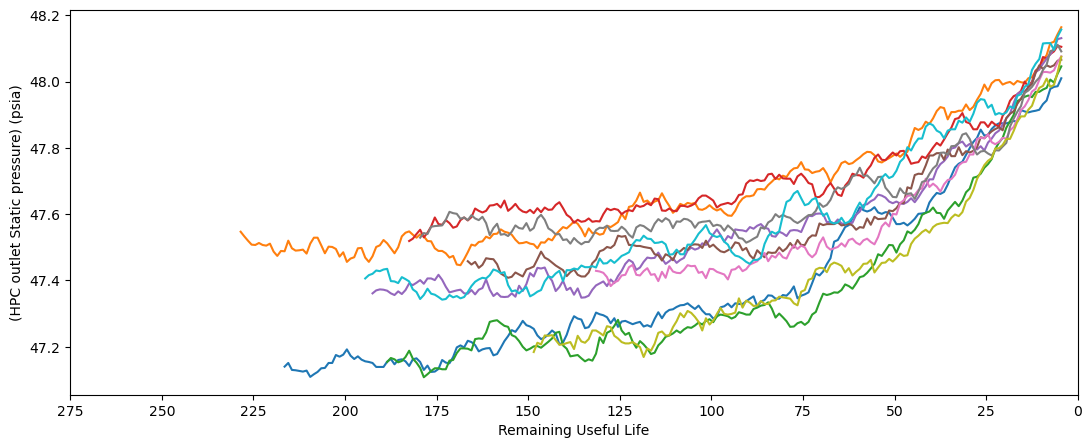

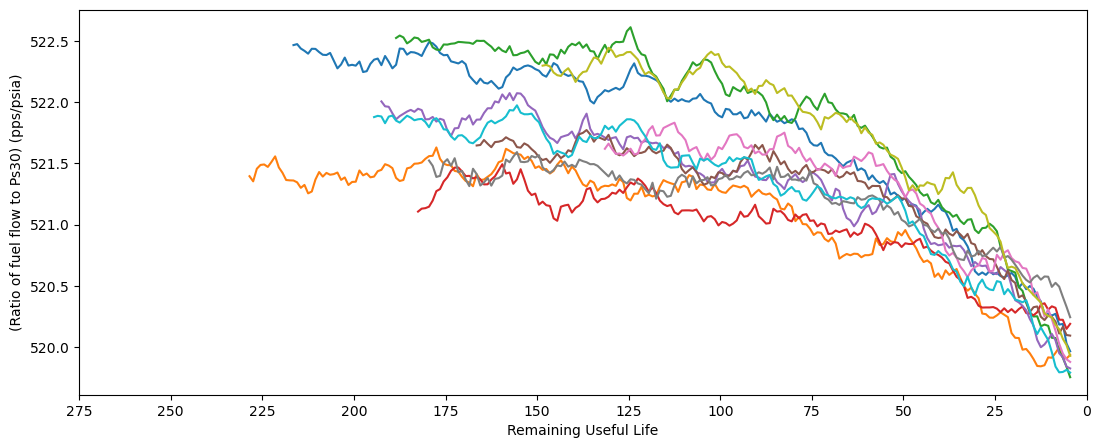

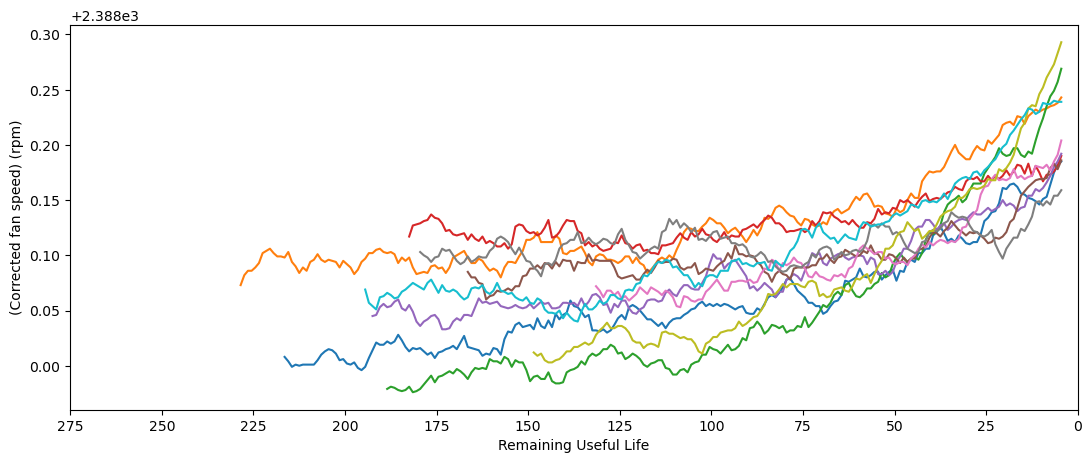

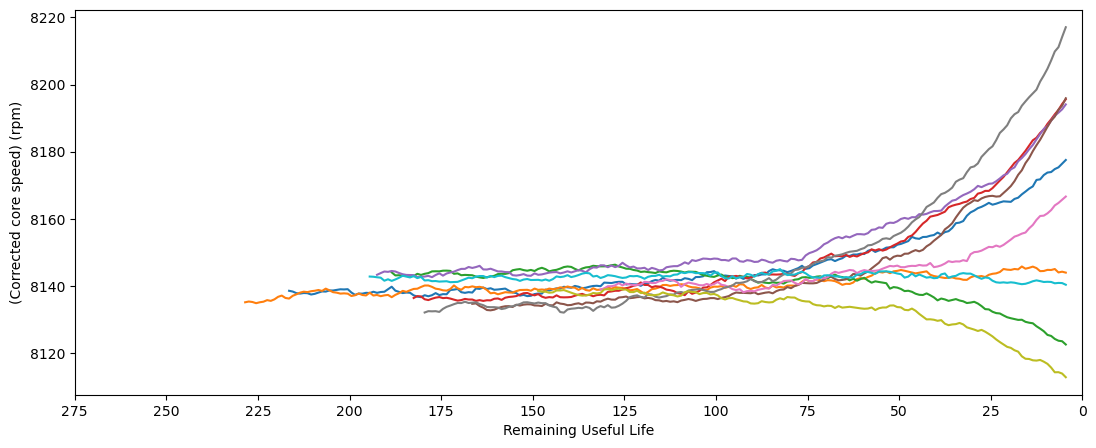

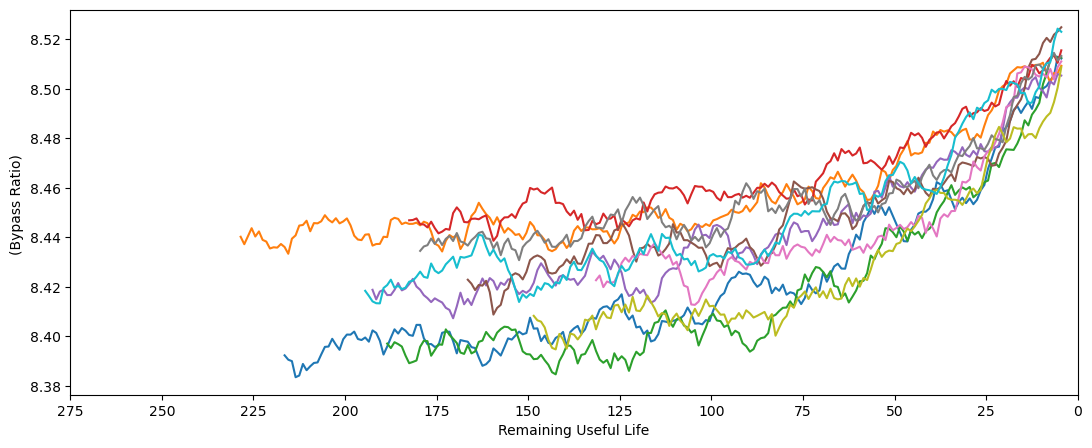

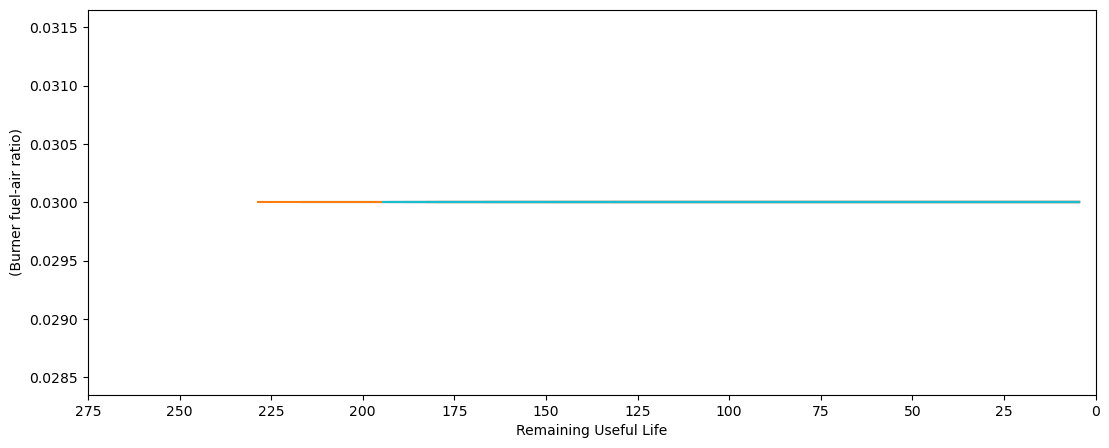

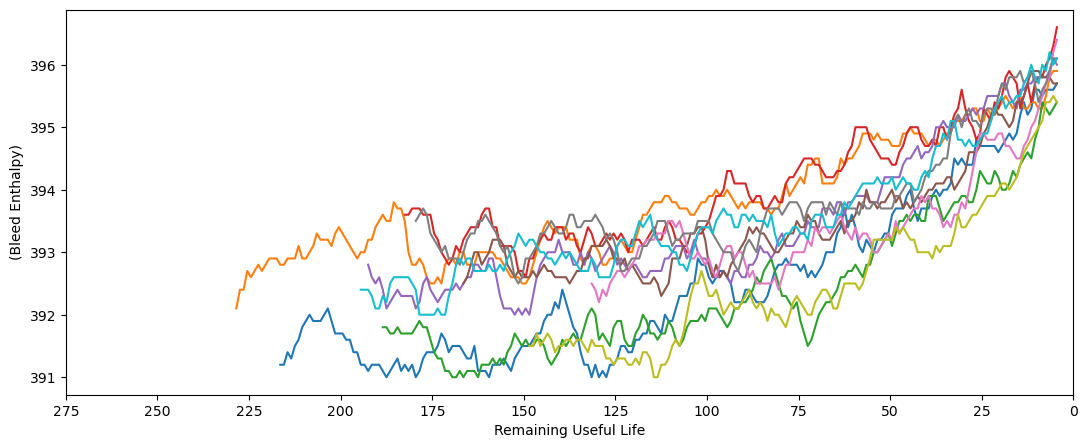

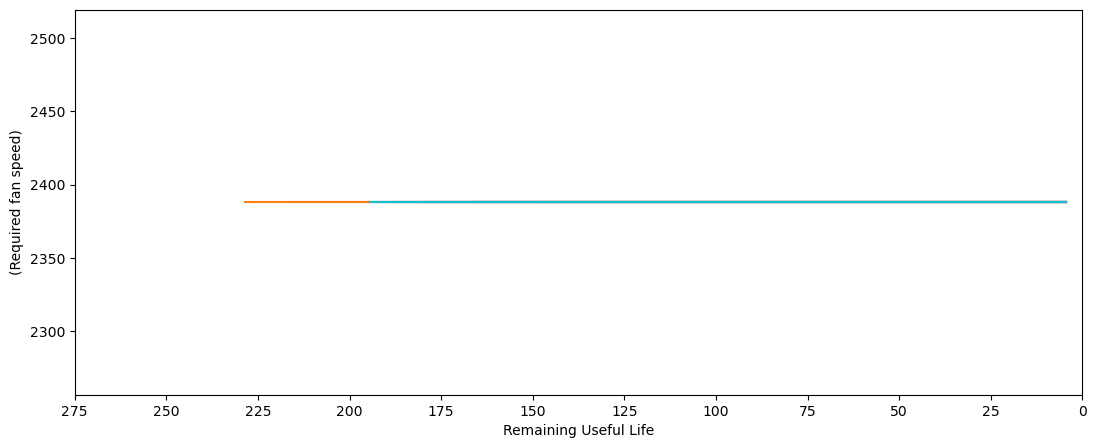

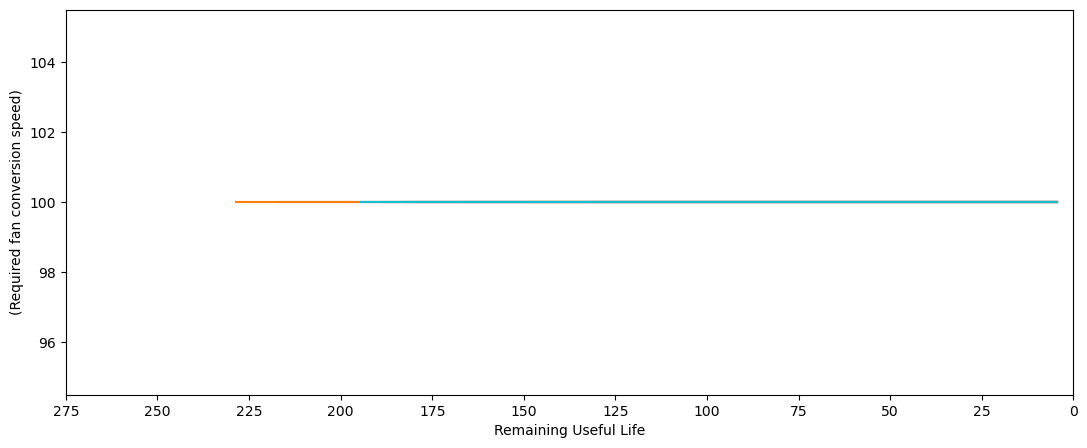

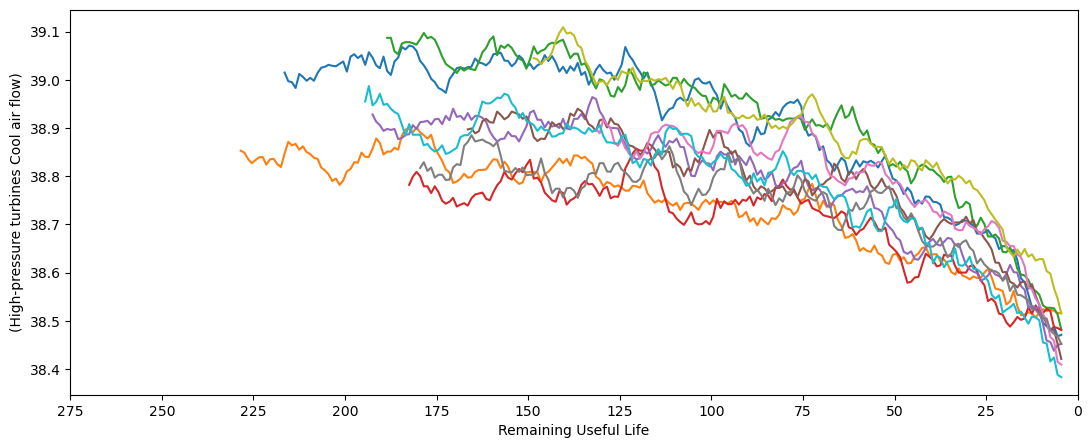

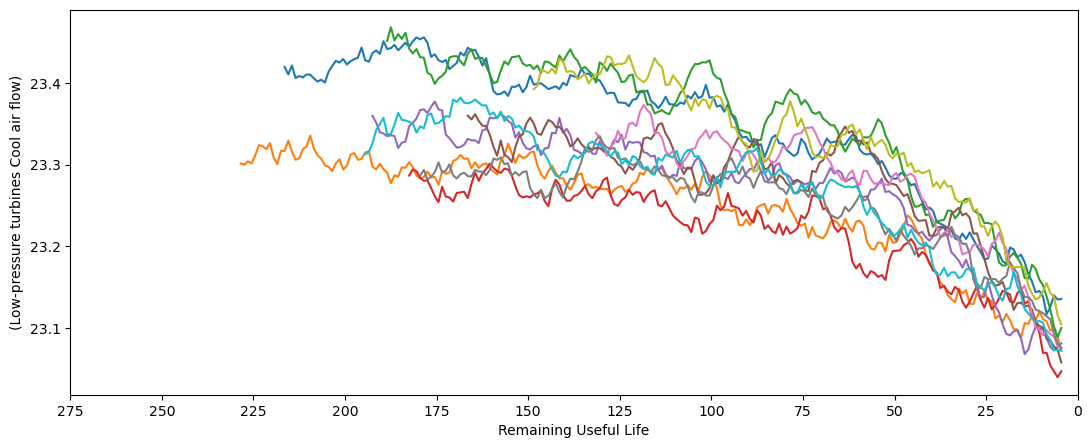

In [29]:
for i in range(1,22):
    try:
        plot_signal(train, Sensor_dictionary,'s_'+str(i))
    except:
        pass

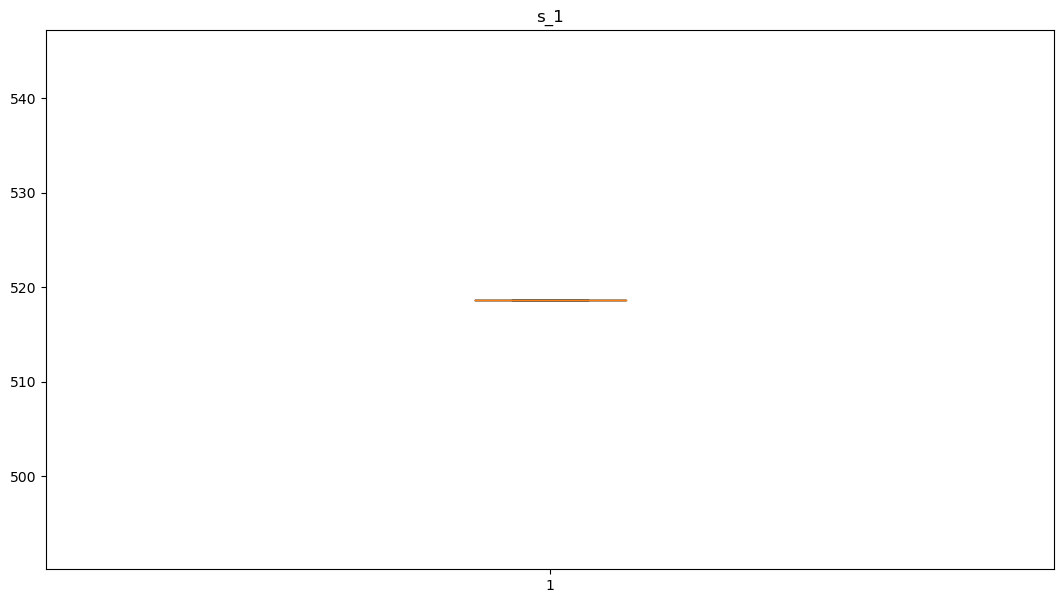

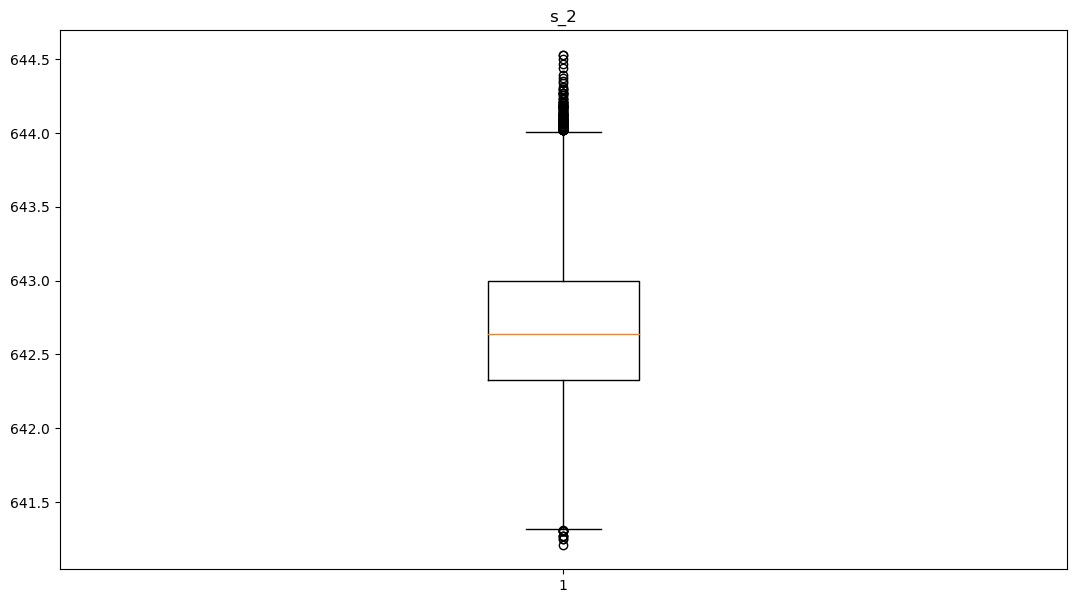

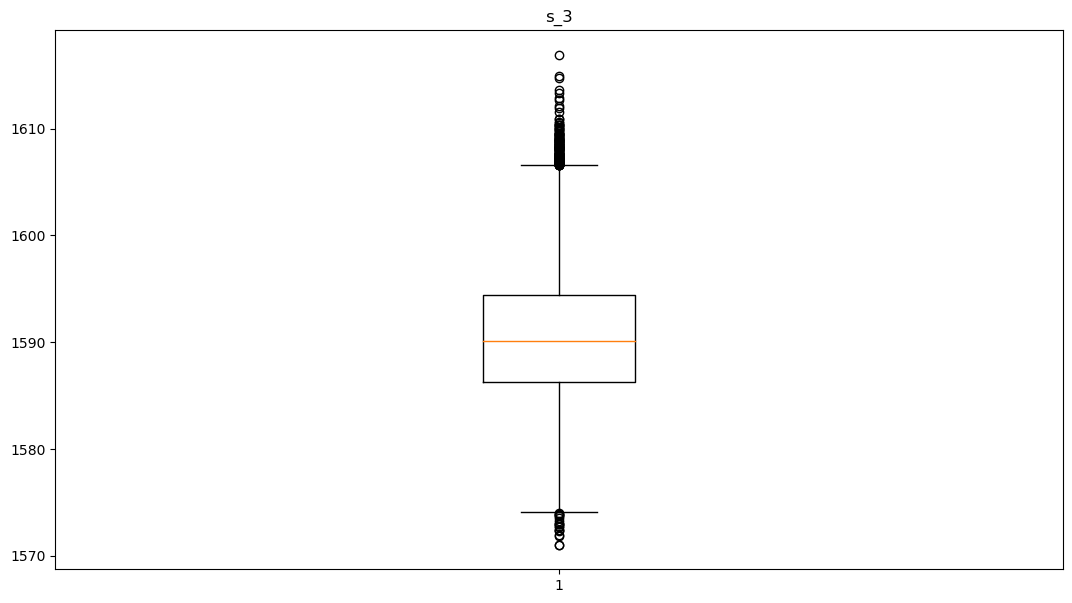

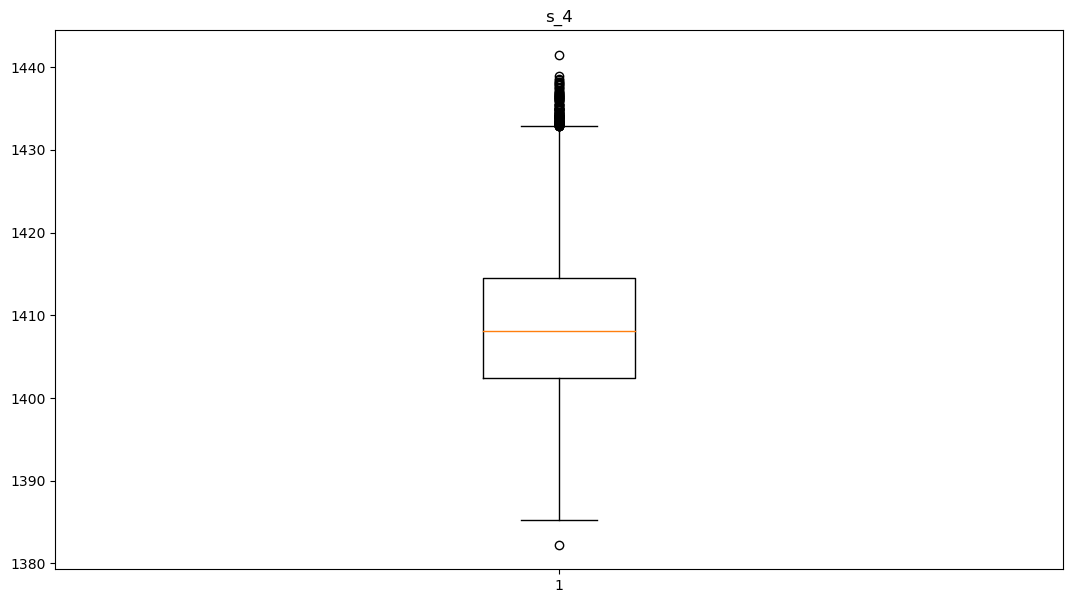

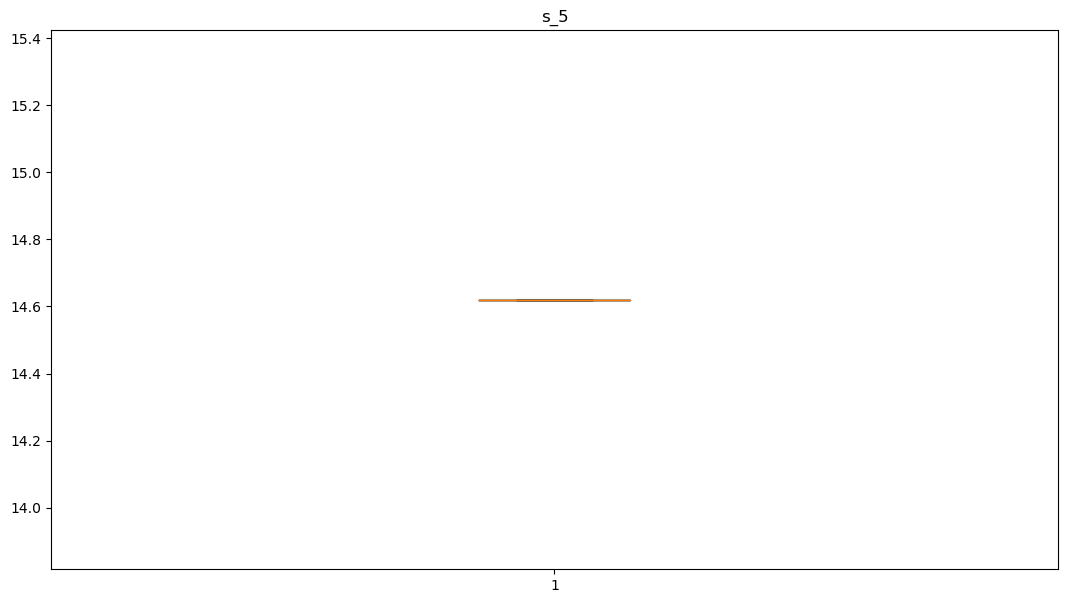

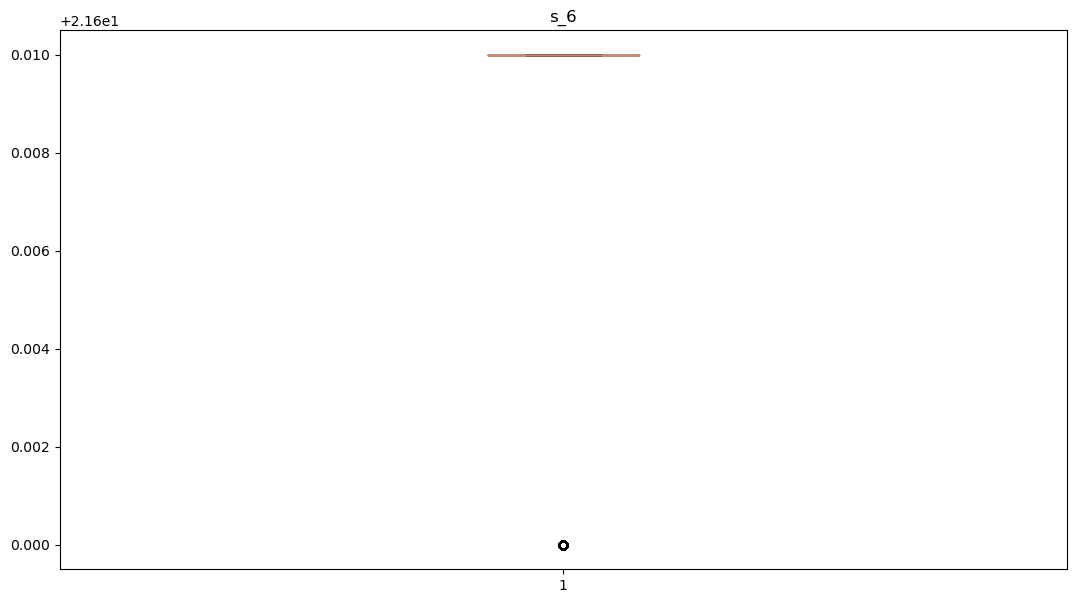

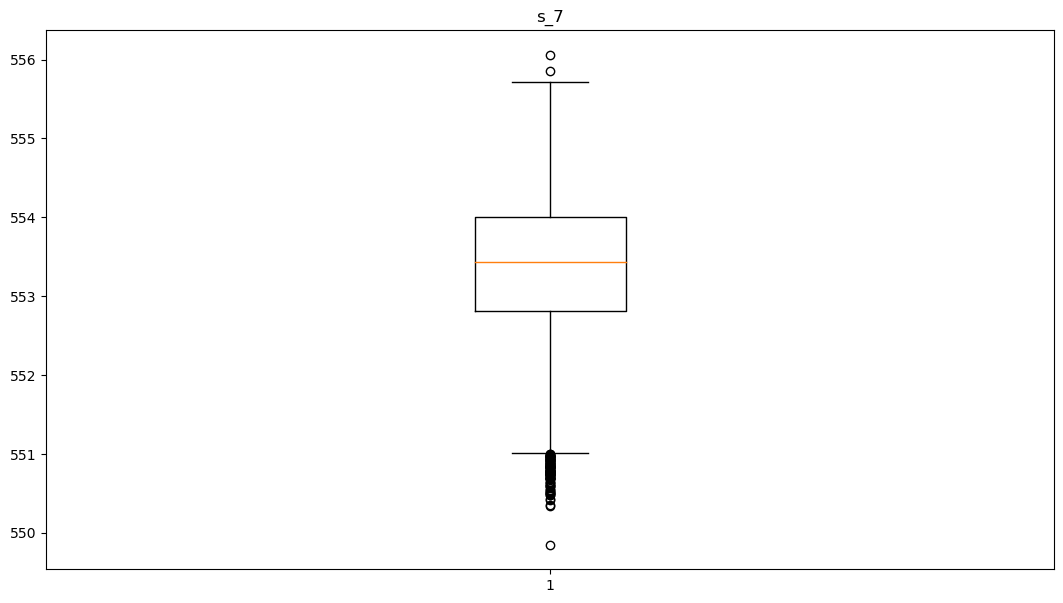

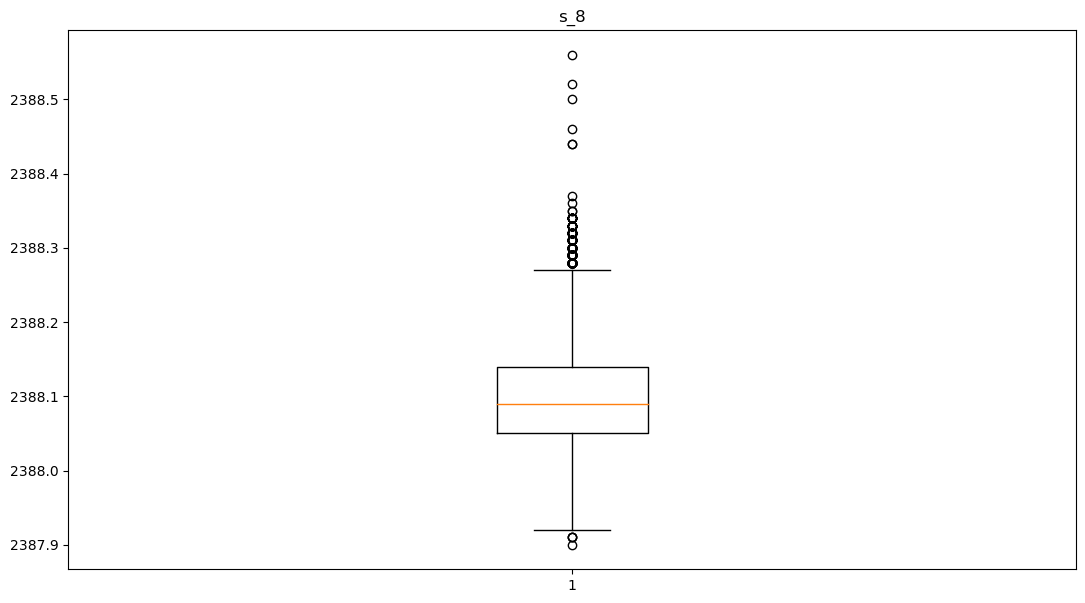

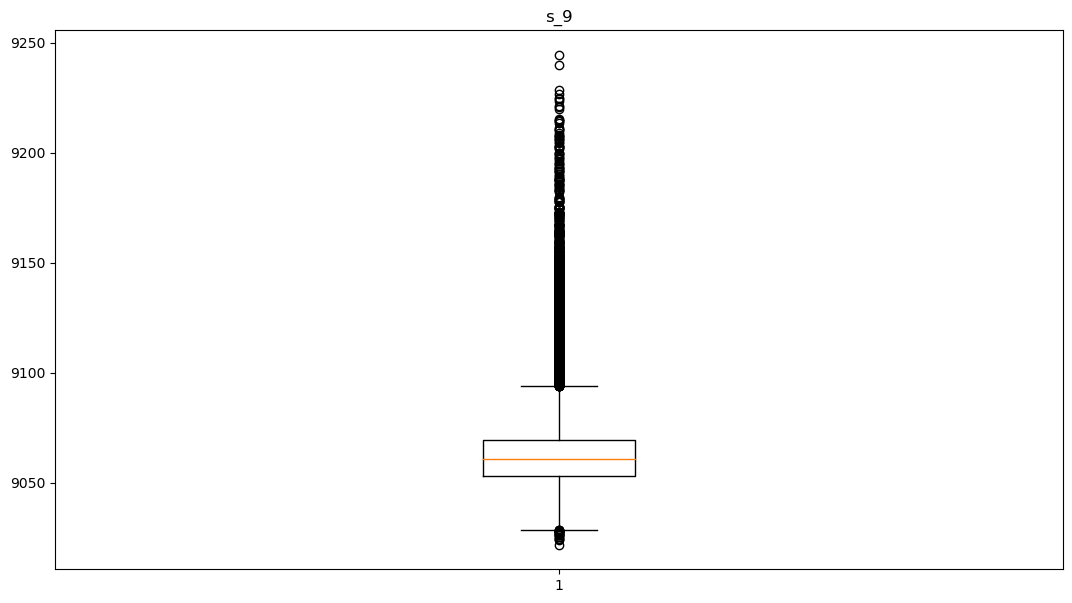

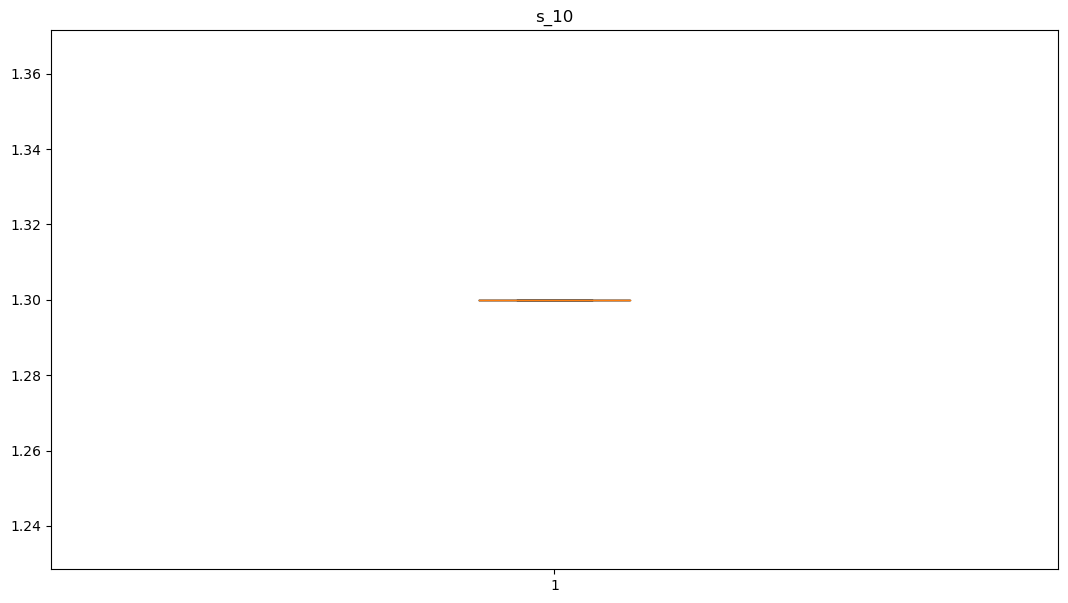

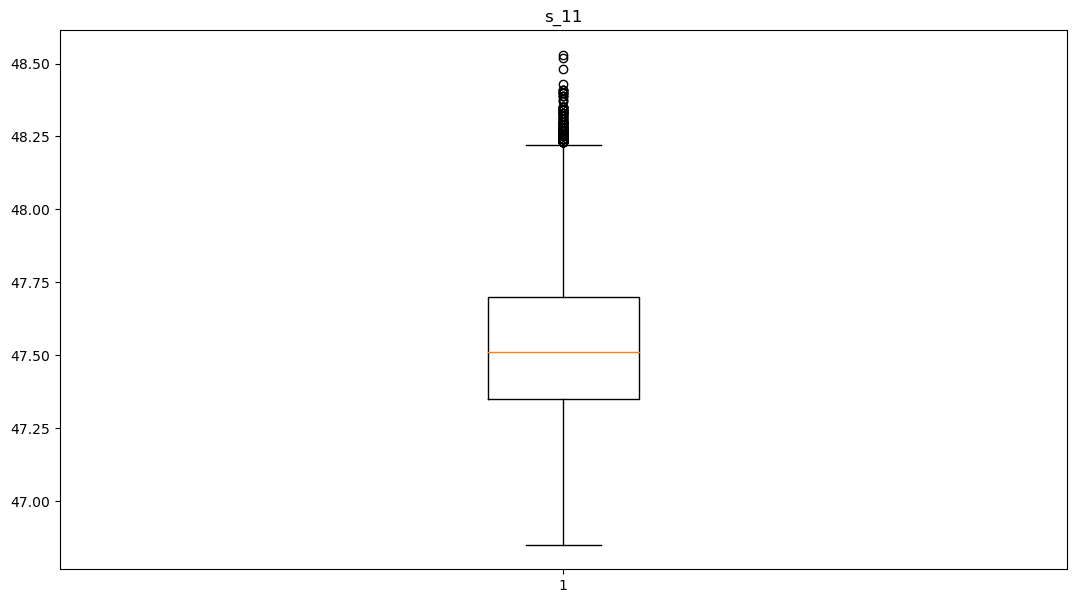

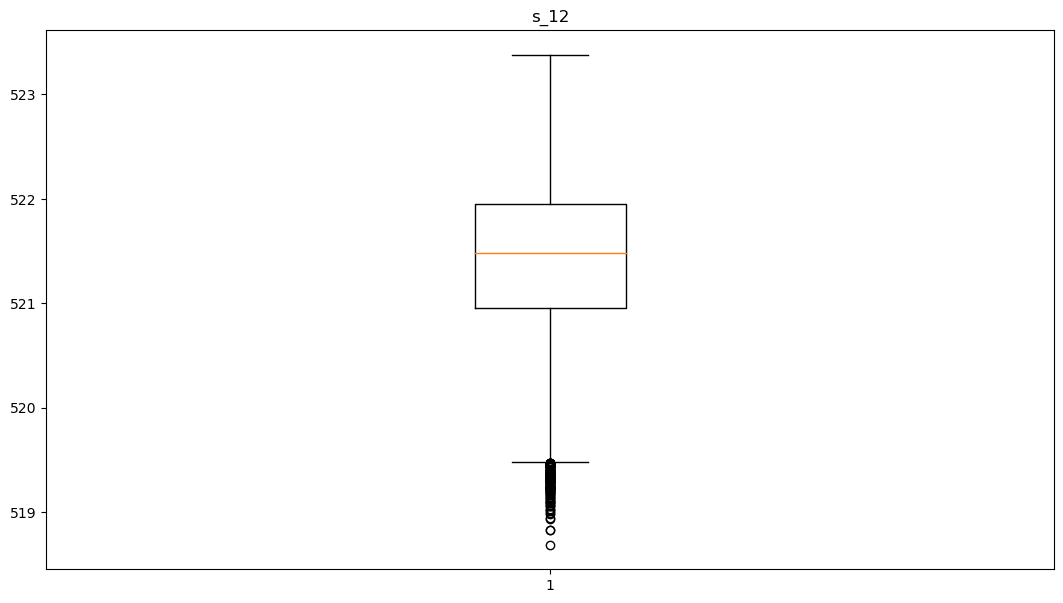

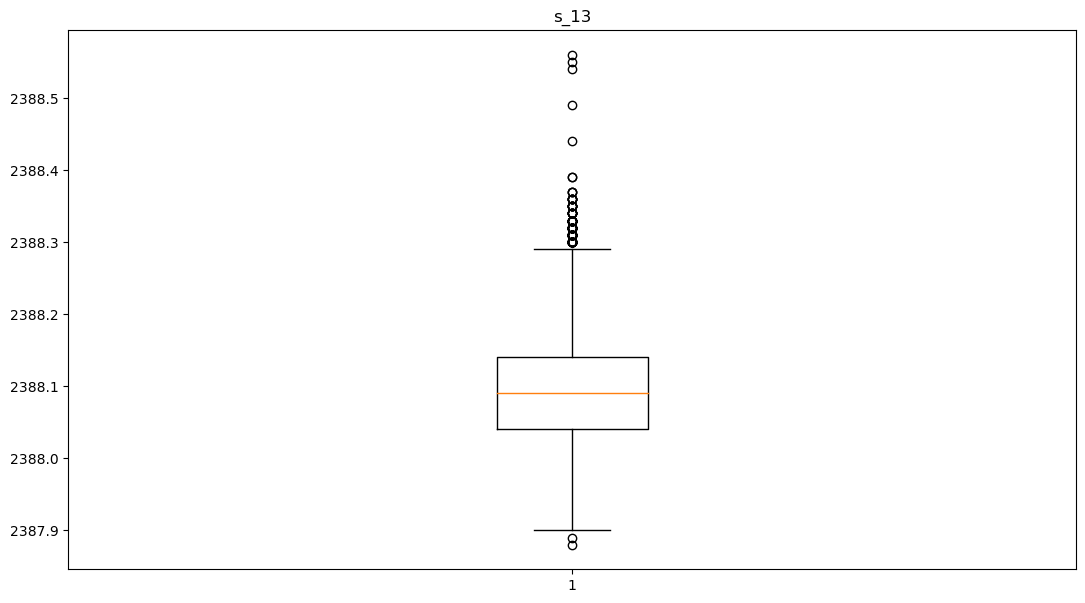

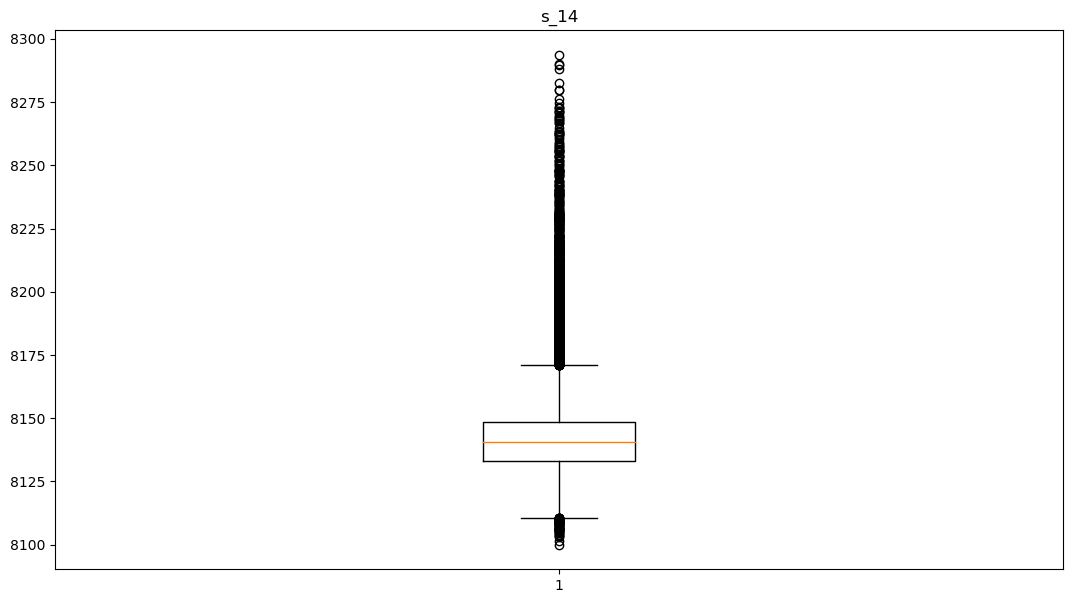

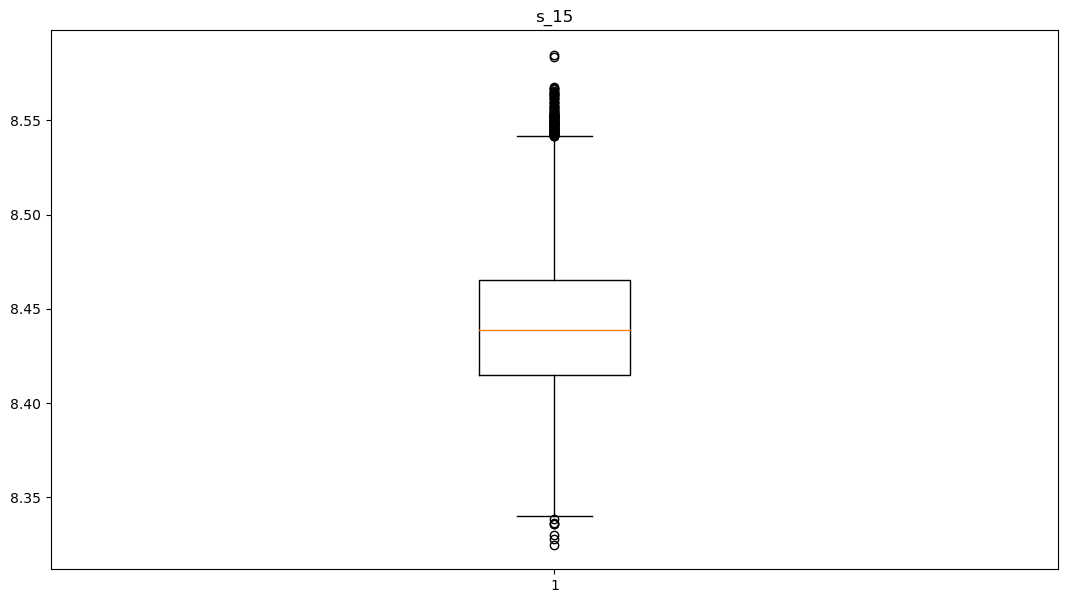

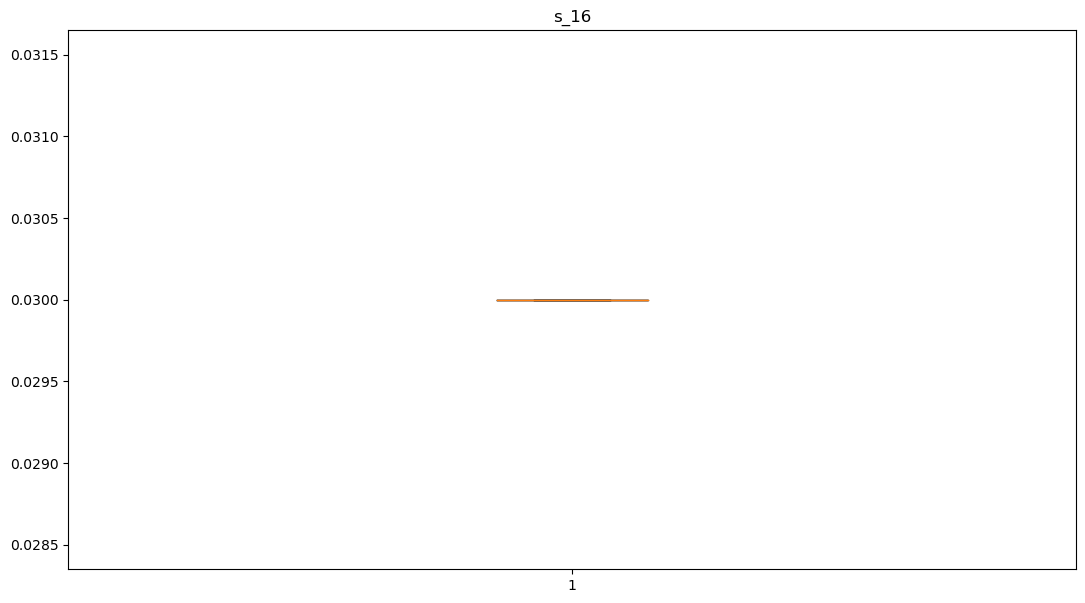

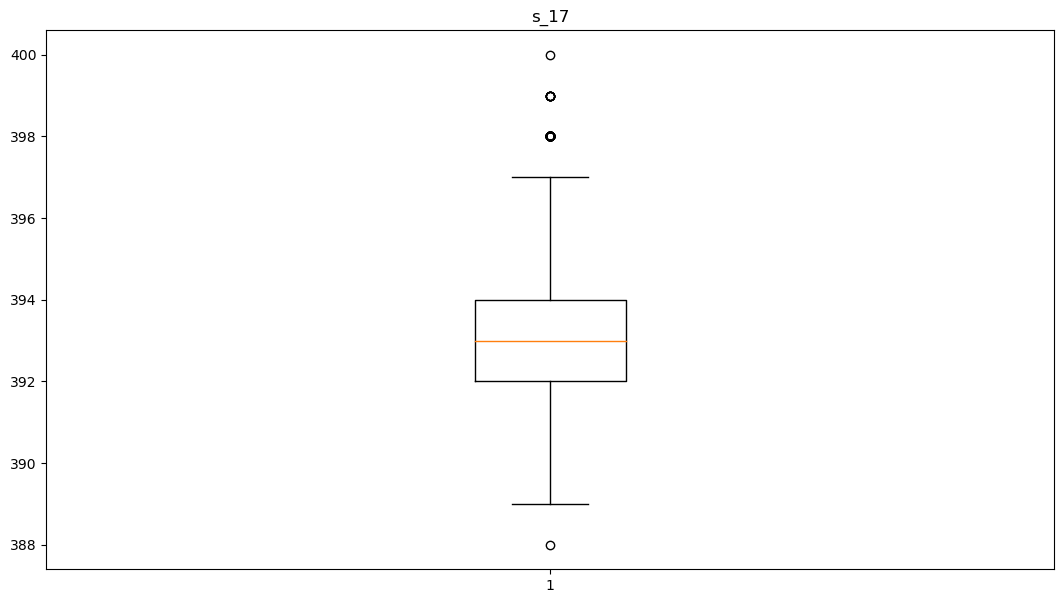

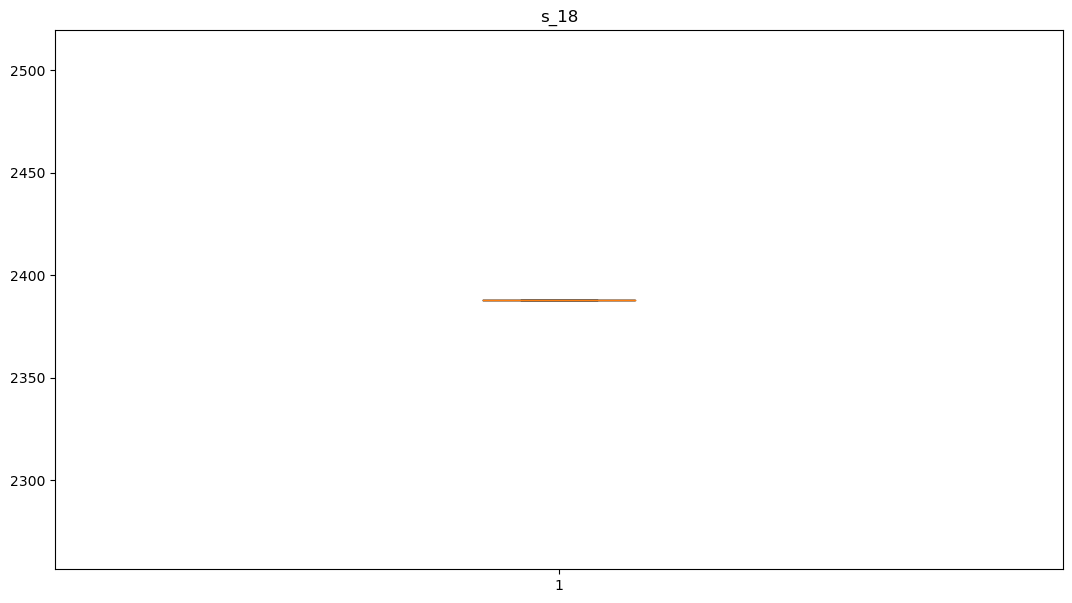

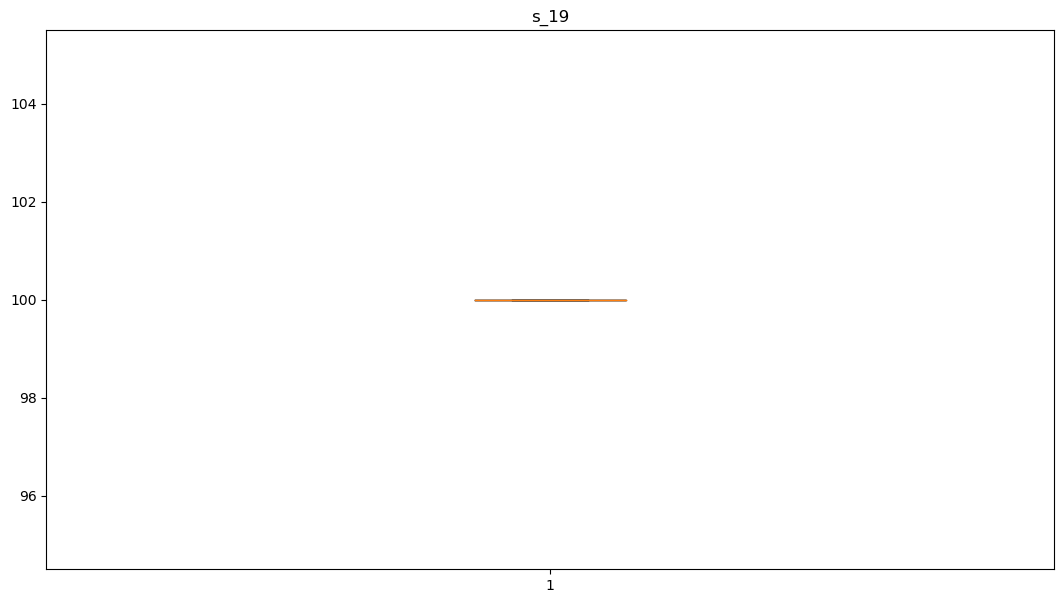

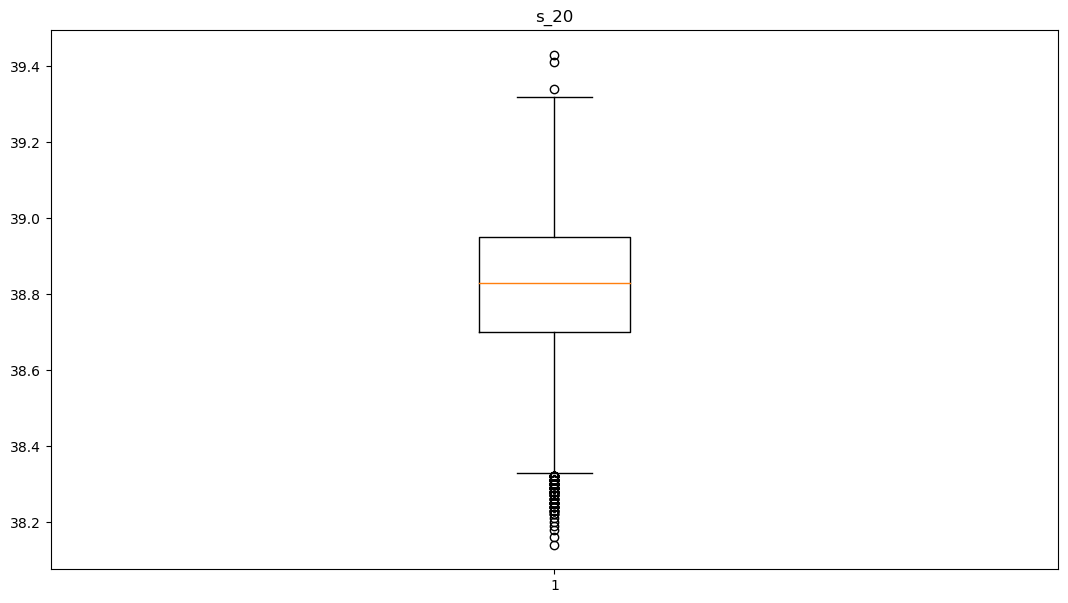

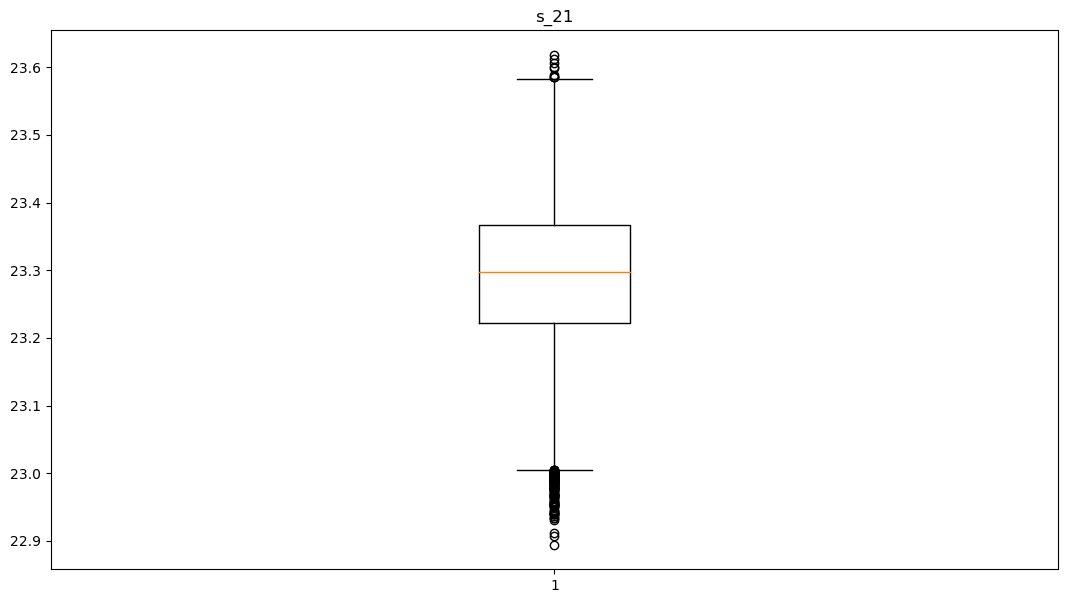

In [30]:
for x in sensor_names:
    plt.figure(figsize=(13,7))
    plt.boxplot(train[x])
    plt.title(x)
    plt.show()

In [31]:
train.loc[:,'s_1':].describe().transpose()

count         mean           std        min        25%        50%  \
s_1   20631.0   518.670000  6.537152e-11   518.6700   518.6700   518.6700   
s_2   20631.0   642.680934  5.000533e-01   641.2100   642.3250   642.6400   
s_3   20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600  1590.1000   
s_4   20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600  1408.0400   
s_5   20631.0    14.620000  3.394700e-12    14.6200    14.6200    14.6200   
s_6   20631.0    21.609803  1.388985e-03    21.6000    21.6100    21.6100   
s_7   20631.0   553.367711  8.850923e-01   549.8500   552.8100   553.4400   
s_8   20631.0  2388.096652  7.098548e-02  2387.9000  2388.0500  2388.0900   
s_9   20631.0  9065.242941  2.208288e+01  9021.7300  9053.1000  9060.6600   
s_10  20631.0     1.300000  4.660829e-13     1.3000     1.3000     1.3000   
s_11  20631.0    47.541168  2.670874e-01    46.8500    47.3500    47.5100   
s_12  20631.0   521.413470  7.375534e-01   518.6900   520.9600   521.4800   
s_13  20631.0  2388.096152  7.191892e-02  2387.8800  2388.0400  2388.0900   
s_14  20631.0  8143.752722  1.907618e+01  8099.9400  8133.2450  8140.5400   
s_15  20631.0     8.442146  3.750504e-02     8.3249     8.4149     8.4389   
s_16  20631.0     0.030000  1.556432e-14     0.0300     0.0300     0.0300   
s_17  20631.0   393.210654  1.548763e+00   388.0000   392.0000   393.0000   
s_18  20631.0  2388.000000  0.000000e+00  2388.0000  2388.0000  2388.0000   
s_19  20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
s_20  20631.0    38.816271  1.807464e-01    38.1400    38.7000    38.8300   
s_21  20631.0    23.289705  1.082509e-01    22.8942    23.2218    23.2979   
RUL   20631.0   107.807862  6.888099e+01     0.0000    51.0000   103.0000   

            75%        max  
s_1    518.6700   518.6700  
s_2    643.0000   644.5300  
s_3   1594.3800  1616.9100  
s_4   1414.5550  1441.4900  
s_5     14.6200    14.6200  
s_6     21.6100    21.6100  
s_7    554.0100   556.0600  
s_8   2388.1400  2388.5600  
s_9   9069.4200  9244.5900  
s_10     1.3000     1.3000  
s_11    47.7000    48.5300  
s_12   521.9500   523.3800  
s_13  2388.1400  2388.5600  
s_14  8148.3100  8293.7200  
s_15     8.4656     8.5848  
s_16     0.0300     0.0300  
s_17   394.0000   400.0000  
s_18  2388.0000  2388.0000  
s_19   100.0000   100.0000  
s_20    38.9500    39.4300  
s_21    23.3668    23.6184  
RUL    155.0000   361.0000

In [32]:
from sklearn.model_selection import train_test_split
drop_labels = index_names+setting_names
X_train=train.drop(columns=drop_labels).copy()
X_train, X_test, y_train, y_test=train_test_split(X_train,X_train['RUL'], test_size=0.3, random_state=42)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train.drop(columns=['RUL'], inplace=True)
X_test.drop(columns=['RUL'], inplace=True)

X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.fit_transform(X_test)

X_valid = valid.groupby('unit_number').last().reset_index().drop(columns=drop_labels)
X_valid_s=scaler.fit_transform(X_valid)

In [35]:
print(X_valid_s.shape)
print(y_valid.shape)

(100, 21)
(100, 1)


array([[<AxesSubplot:title={'center':'s_2'}>,
        <AxesSubplot:title={'center':'s_3'}>,
        <AxesSubplot:title={'center':'s_4'}>,
        <AxesSubplot:title={'center':'s_7'}>],
       [<AxesSubplot:title={'center':'s_8'}>,
        <AxesSubplot:title={'center':'s_9'}>,
        <AxesSubplot:title={'center':'s_11'}>,
        <AxesSubplot:title={'center':'s_12'}>],
       [<AxesSubplot:title={'center':'s_13'}>,
        <AxesSubplot:title={'center':'s_14'}>,
        <AxesSubplot:title={'center':'s_15'}>,
        <AxesSubplot:title={'center':'s_17'}>],
       [<AxesSubplot:title={'center':'s_20'}>,
        <AxesSubplot:title={'center':'s_21'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

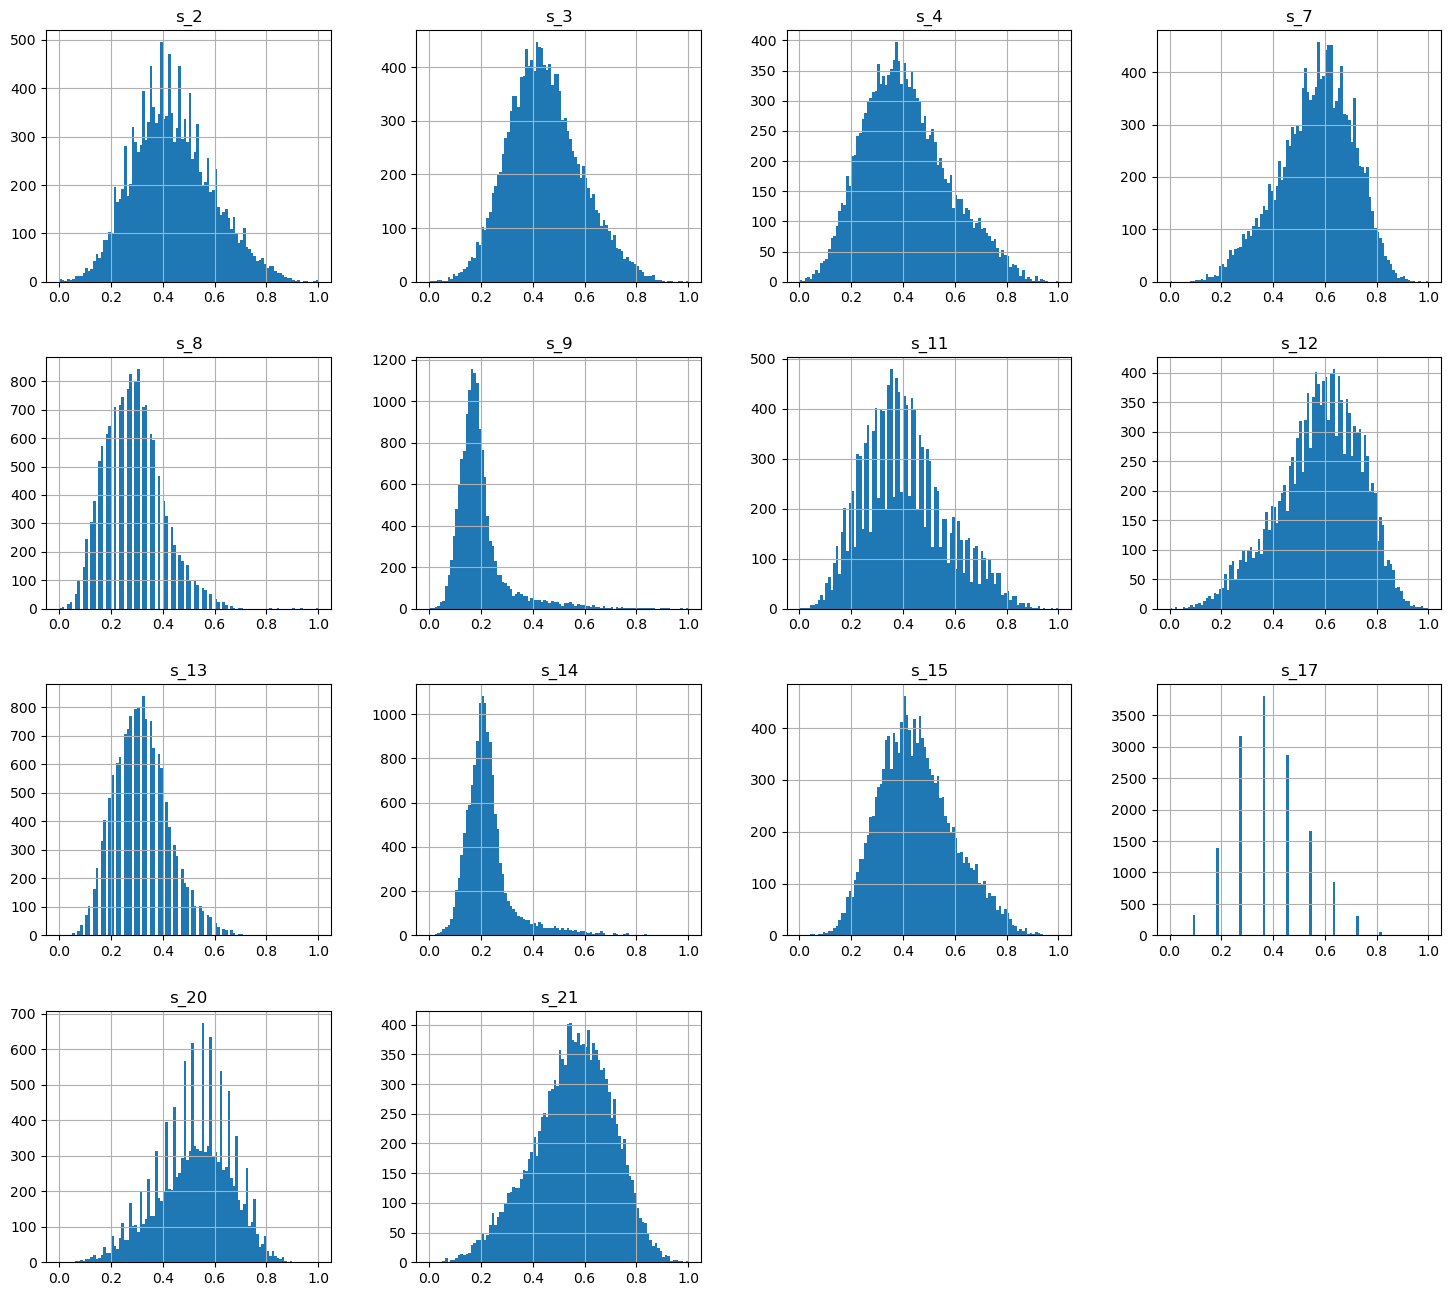

In [36]:
sensor_names=['s_{}'.format(i) for i in range(1,22) if i not in [1,5,6,10,16,18,19]]
pd.DataFrame(X_train_s,columns=['s_{}'.format(i) for i in range(1,22)])[sensor_names].hist(bins=100,figsize=(18,16))

# Model Implementation

In [37]:
class Linear_Regression() :
    def __init__( self, lr=0.01, iterations=150 ) :    
        self.lr = lr
        self.iterations = iterations     
    def fit( self, X, Y ) :
        self.l, self.p = X.shape
        # weight initializer
        self.W = np.zeros( self.p )
        self.b = 0
        self.X = X
        self.Y = Y
        # gradientlearning      
        for i in range( self.iterations ) :  
            self.weight_updater()
        return self
         
    def weight_updater( self ) :
        Y_pred = self.predict( self.X )  
        #  gradients  
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.l
        db = - 2 * np.sum( self.Y - Y_pred ) / self.l
        # new weights assigned
        self.b = self.b - self.lr * db
        self.W = self.W - self.lr * dW
        return self
          
    def predict( self, X ) :
          # Y_pr=X.W+b
        return X.dot( self.W ) + self.b
     
  

In [38]:
#SVR

from sklearn.svm import SVR
import tensorflow as tf
regressor = SVR(kernel='rbf')

In [39]:
#Random Forest

rf = RandomForestRegressor(max_features="sqrt", random_state=42)

In [40]:
#Defining Evaluation Function

def evaluate(y_true,y_hat,label='test'):
    mse=mean_squared_error(y_true,y_hat)
    rmse=np.sqrt(mse)
    variance=r2_score(y_true,y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label,rmse,variance))

In [41]:
#plot real data and the predicted one to make some comparison

def plot_predActual(y_test,y_test_hat):
    
    indices=np.arange(len(y_test_hat))
    wth=0.6
    plt.figure(figsize=(70,30))
    true_values=[int(x) for x in y_test.values]
    predicted_values=list(y_test_hat)
    
    plt.bar(indices,true_values,width=wth,color='b',label='True RUL')
    plt.bar([i for i in indices],predicted_values,width=0.5*wth,color='r',alpha=0.7,label='Predicted RUL')
    
    plt.legend(prop={'size':40})
    plt.tick_params(labelsize=40)
    
    plt.show()

In [42]:
lr=Linear_Regression()
lr.fit(X=X_train_s, Y=y_train)

y_lr_train=lr.predict(X_train_s)
evaluate(y_train,y_lr_train,label='train')

y_lr_test=lr.predict(X_test_s)
evaluate(y_test,y_lr_test,label="test")

y_lr_valid=lr.predict(X_valid_s)
evaluate(y_valid,y_lr_valid,label='valid')

train set RMSE:56.19869318681088, R2:0.3439361345919162
test set RMSE:54.264009074691856, R2:0.35713062175493715
valid set RMSE:34.84962228223509, R2:0.2967064952591344


In [43]:
#SVR

regressor.fit(X_train_s,y_train)

y_svr_train=regressor.predict(X_train_s)
evaluate(y_train,y_svr_train,label='train')

y_svr_test = regressor.predict(X_test_s) 
evaluate(y_test, y_svr_test, label='test')

y_svr_valid= lr.predict(X_valid_s)  
evaluate(y_valid, y_svr_valid, label='valid')

train set RMSE:43.56448464126648, R2:0.605761670162996
test set RMSE:47.26718449996111, R2:0.5122262167433573
valid set RMSE:34.84962228223509, R2:0.2967064952591344


In [44]:
#RANDOM FOREST REGRESSOR

rf.fit(X_train_s, y_train)

y_rf_train = rf.predict(X_train_s)
evaluate(y_train,y_rf_train, label='train')

y_rf_test = rf.predict(X_test_s)
evaluate(y_test, y_rf_test, label='test')

y_rf_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_rf_valid, label='valid')

train set RMSE:15.408303170220156, R2:0.9506822432050425
test set RMSE:44.36383009860364, R2:0.5703082128383993
valid set RMSE:30.653618024631285, R2:0.45586841183607596


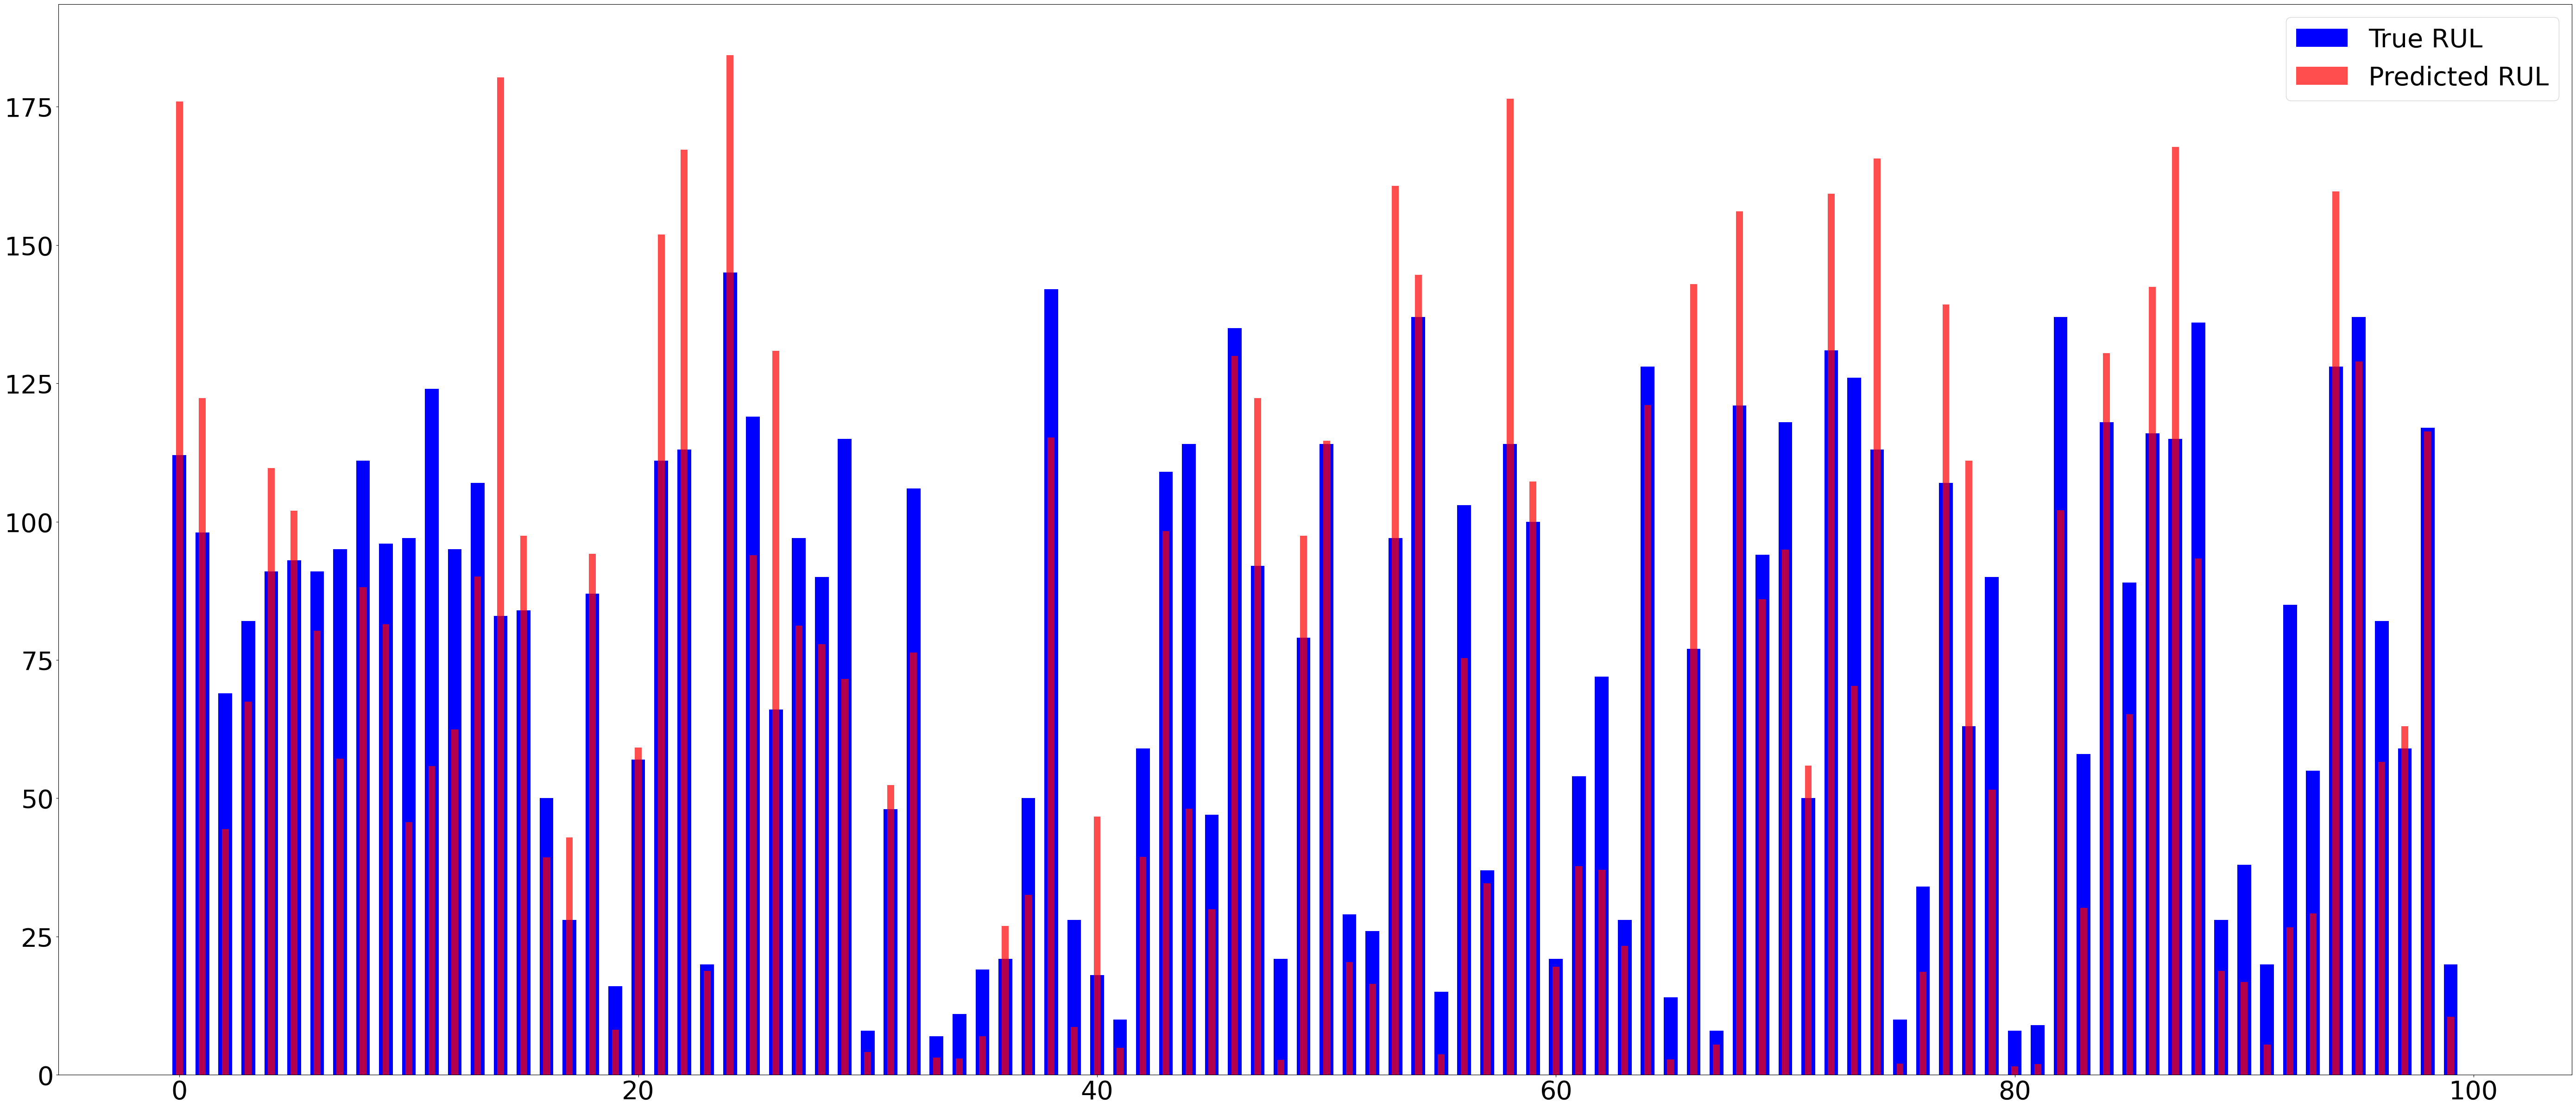

In [45]:
plot_predActual(y_valid, y_rf_valid)

In [46]:
# Above, We are observing that our model is overestimating the RUL.
# Here, we will remove the constant signals and set the max rul to 195 for better prediction and for reducing some overhead

In [47]:
print('Maximum of y_train: ',y_train.max())
print('Maximum of y_test : ',y_test.max())
print('Maximum of y_valid : ',y_valid.max())

Maximum of y_train:  361
Maximum of y_test :  360
Maximum of y_valid :  RUL    145
dtype: int64


(array([1023., 1066., 1083., 1120.,  937.,  557.,  237.,  117.,   35.,
          15.]),
 array([  0.,  36.,  72., 108., 144., 180., 216., 252., 288., 324., 360.]),
 <BarContainer object of 10 artists>)

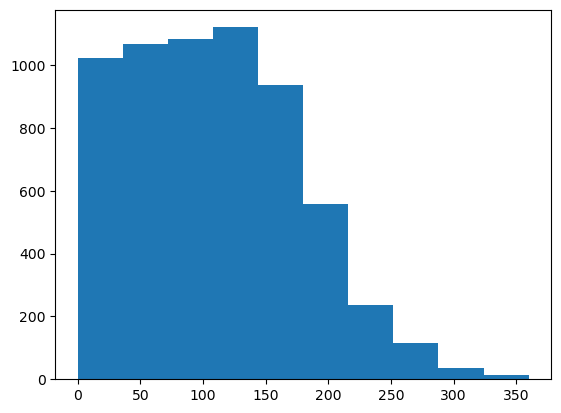

In [48]:
plt.hist(y_test)

In [49]:
drop_labels2=['s_1', 's_5','s_6','s_10','s_16', 's_18', 's_19']
X_train_2=X_train.drop(columns=drop_labels2, axis=1) # drop the constant columns from the train dataset
X_test_2=X_test.drop(columns=drop_labels2, axis=1)  # drop the constant columns from the test dataset
X_train_2_s=scaler.fit_transform(X_train_2) #scaling X_train_2
X_test_2_s=scaler.fit_transform(X_test_2) #scaling X_test_2
y_train_clip=y_train.clip(upper=195)  #Clipping y_train to have 195 as the maximum value 
X_valid_2=X_valid.drop(columns=drop_labels2, axis=1)  # drop the constant columns from the validation dataset
X_valid_2_s=scaler.fit_transform(X_valid_2) #scaling X_valid_2

In [50]:
#Linear Regression

lr=Linear_Regression()
lr.fit(X=X_train_2_s, Y=y_train_clip)

y_lr_train = lr.predict(X_train_2_s)
evaluate(y_train_clip,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_2_s)
evaluate(y_test, y_lr_test, label='test')

y_lr_valid = lr.predict(X_valid_2_s)
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:47.86312955545103, R2:0.3792662465007207
test set RMSE:55.6261002397046, R2:0.3244519972933424
valid set RMSE:34.21070108960351, R2:0.3222579927041398


In [51]:
#SVR

regressor.fit(X_train_2_s, y_train)

y_svr_train = regressor.predict(X_train_2_s)
evaluate(y_train_clip,y_svr_train, label='train')

y_svr_test = regressor.predict(X_test_2_s)
evaluate(y_test, y_svr_test, label='test')

y_svr_valid = regressor.predict(X_valid_2_s)
evaluate(y_valid, y_svr_valid, label='valid')



train set RMSE:32.91543148706821, R2:0.7064363470171215
test set RMSE:48.75516379159361, R2:0.48103242301470384
valid set RMSE:25.947912225366203, R2:0.6101071274546098


In [52]:
#Random forest

rf.fit(X_train_2_s, y_train_clip)
# predict and evaluate
y_rf_train = rf.predict(X_train_2_s)
evaluate(y_train_clip,y_rf_train, label='train')

y_rf_test = rf.predict(X_test_2_s)
evaluate(y_test, y_rf_test, label='test')

y_rf_valid = rf.predict(X_valid_2_s)
evaluate(y_valid, y_rf_valid, label='valid')


train set RMSE:12.036862499525814, R2:0.9607418547981479
test set RMSE:45.81838291793876, R2:0.5416697719315231
valid set RMSE:26.548403567823055, R2:0.5918523714819


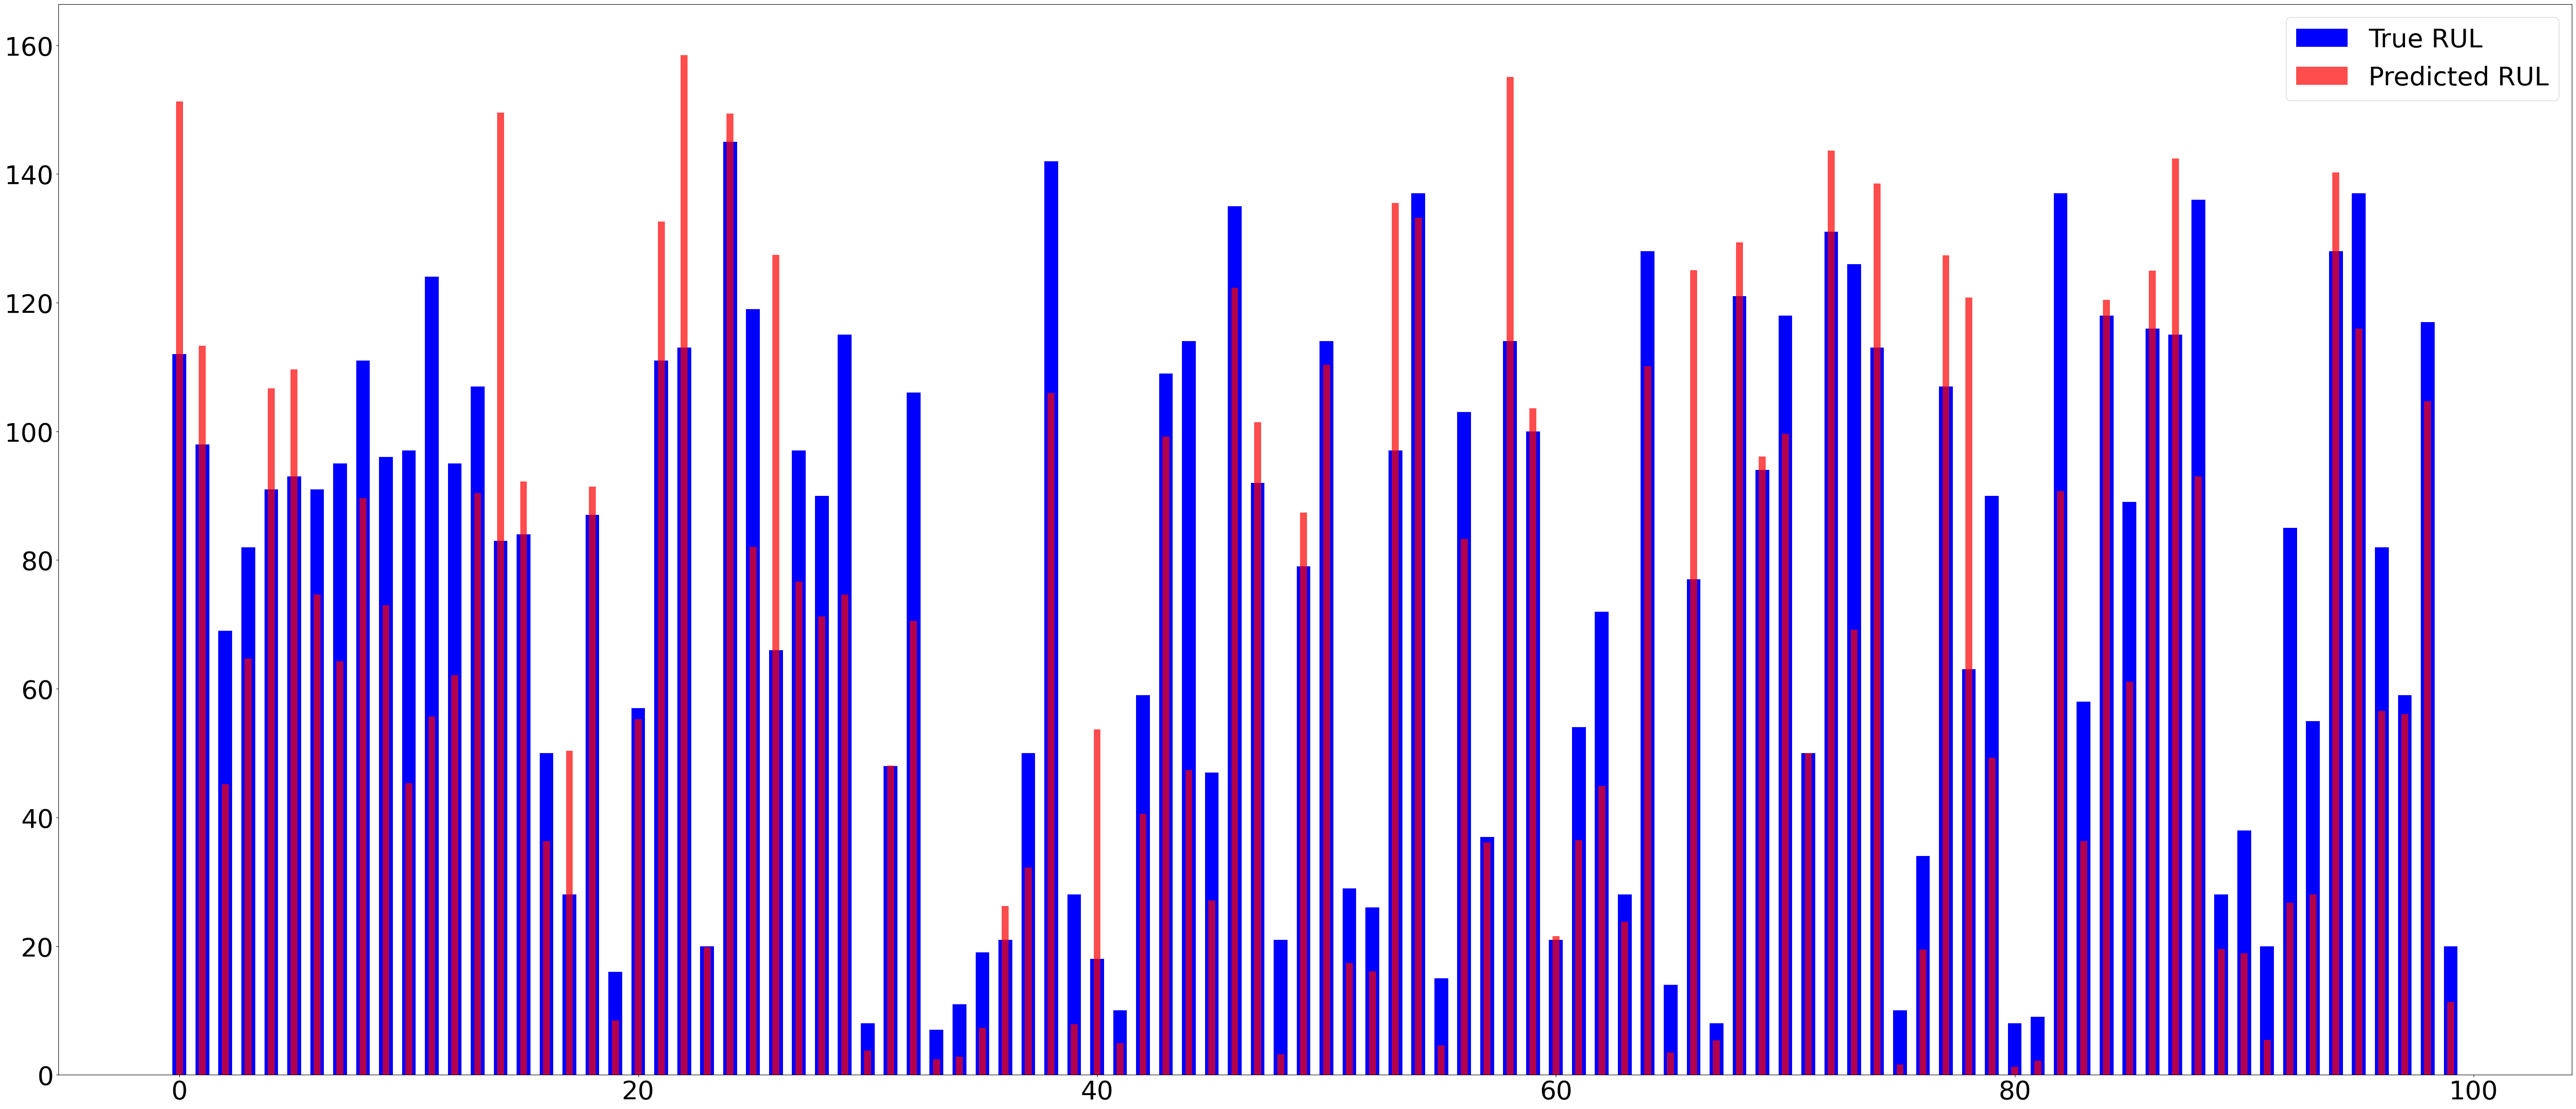

In [54]:
plot_predActual(y_valid,y_rf_valid)

In [55]:
df=train.copy()
for x in X_train_2.columns:
    df[x+'_rm']=0

    
df.columns

Index(['unit_number', 'time_cycles', 'setting_1', 'setting_2', 'setting_3',
       's_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10',
       's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19',
       's_20', 's_21', 'RUL', 's_2_rm', 's_3_rm', 's_4_rm', 's_7_rm', 's_8_rm',
       's_9_rm', 's_11_rm', 's_12_rm', 's_13_rm', 's_14_rm', 's_15_rm',
       's_17_rm', 's_20_rm', 's_21_rm'],
      dtype='object')

In [56]:
drop_labels2=['s_1', 's_5','s_6','s_10','s_16','s_18','s_19']
df=df.drop(columns=setting_names+drop_labels2+['RUL'], axis=1)

X_valid_3=valid.drop(columns=index_names+setting_names+drop_labels2, axis=1)

In [57]:
def update_rolling_mean(data, mask):
    for x, group in mask.groupby("unit_number"):
        for x in X_train_2.columns:
            data.loc[group.index[10:], x+"_rm"] = data.loc[group.index, x].rolling(10).mean()[10:]
            data.loc[group.index[:10], x+"_rm"] = data.loc[group.index[:10], x]

update_rolling_mean(df, df)
update_rolling_mean(X_valid_3, valid)

X_valid_3=X_valid_3.fillna(0)

In [58]:
train_tm=df
train_tm=train_tm.drop(columns=index_names,axis=1)

In [59]:
X_train_tm, X_test_tm, y_train_tm, y_test_tm=train_test_split(train_tm,train['RUL'].clip(upper=195), test_size=0.35, random_state=42)
X_train_tm_s=scaler.fit_transform(X_train_tm)
X_test_tm_s=scaler.fit_transform(X_test_tm)
X_val3=pd.concat([valid['unit_number'],X_valid_3],axis=1)
X_valid3 = X_val3.groupby('unit_number').last().reset_index().drop(columns=['unit_number'])
X_valid_s=scaler.fit_transform(X_valid3)

# Models Evaluation(RMSE,R2,features importance)

In [60]:
#Linear Regression

lr=Linear_Regression()
lr.fit(X_train_tm_s, y_train_tm)

y_lr_train = lr.predict(X_train_tm_s)
evaluate(y_train_tm,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_tm_s)
evaluate(y_test_tm, y_lr_test, label='test')

y_lr_valid = lr.predict(X_valid_s)
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:40.529124801409225, R2:0.5544983519999881
test set RMSE:40.09893732905365, R2:0.5545324875936375
valid set RMSE:38.37340578135016, R2:0.14729040845923846


In [61]:
#SVR

regressor.fit(X_train_tm_s, y_train_tm)

y_svr_train = regressor.predict(X_train_tm_s)
evaluate(y_train_tm,y_svr_train, label='train')

y_svr_test = regressor.predict(X_test_tm_s)
evaluate(y_test_tm, y_svr_test, label='test')

y_svr_valid = regressor.predict(X_valid_s)
evaluate(y_valid, y_svr_valid, label='valid')


train set RMSE:32.48451160933286, R2:0.713801372146734
test set RMSE:33.828645374092, R2:0.6829560102536554
valid set RMSE:26.64758512478152, R2:0.5887970967915137


In [62]:
#Random Forest

rf = RandomForestRegressor(max_features="sqrt", random_state=42)
rf.fit(X_train_tm_s, y_train_tm)
# predict and evaluate
y_hat_train = rf.predict(X_train_tm_s)
evaluate(y_train_tm,y_hat_train, label='train')
y_hat_test = rf.predict(X_test_tm_s)
evaluate(y_test_tm, y_hat_test, label='test')
y_hat_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')


train set RMSE:9.790326296568903, R2:0.9740038402776197
test set RMSE:29.944440985060467, R2:0.7515821894801602
valid set RMSE:37.7401079357227, R2:0.17520364768712138


In [66]:
#Cross Validation

train_tm

s_2      s_3      s_4     s_7      s_8      s_9   s_11    s_12  \
0      641.82  1589.70  1400.60  554.36  2388.06  9046.19  47.47  521.66   
1      642.15  1591.82  1403.14  553.75  2388.04  9044.07  47.49  522.28   
2      642.35  1587.99  1404.20  554.26  2388.08  9052.94  47.27  522.42   
3      642.35  1582.79  1401.87  554.45  2388.11  9049.48  47.13  522.86   
4      642.37  1582.85  1406.22  554.00  2388.06  9055.15  47.28  522.19   
...       ...      ...      ...     ...      ...      ...    ...     ...   
20626  643.49  1597.98  1428.63  551.43  2388.19  9065.52  48.07  519.49   
20627  643.54  1604.50  1433.58  550.86  2388.23  9065.11  48.04  519.68   
20628  643.42  1602.46  1428.18  550.94  2388.24  9065.90  48.09  520.01   
20629  643.23  1605.26  1426.53  550.68  2388.25  9073.72  48.39  519.67   
20630  643.85  1600.38  1432.14  550.79  2388.26  9061.48  48.20  519.30   

          s_13     s_14  ...    s_8_rm    s_9_rm  s_11_rm  s_12_rm   s_13_rm  \
0      2388.02  8138.62  ...  2388.060  9046.190   47.470  521.660  2388.020   
1      2388.07  8131.49  ...  2388.040  9044.070   47.490  522.280  2388.070   
2      2388.03  8133.23  ...  2388.080  9052.940   47.270  522.420  2388.030   
3      2388.08  8133.83  ...  2388.110  9049.480   47.130  522.860  2388.080   
4      2388.04  8133.80  ...  2388.060  9055.150   47.280  522.190  2388.040   
...        ...      ...  ...       ...       ...      ...      ...       ...   
20626  2388.26  8137.60  ...  2388.224  9066.903   48.116  519.840  2388.237   
20627  2388.22  8136.50  ...  2388.225  9066.820   48.116  519.793  2388.237   
20628  2388.24  8141.05  ...  2388.223  9066.642   48.096  519.796  2388.240   
20629  2388.23  8139.29  ...  2388.230  9067.045   48.136  519.813  2388.239   
20630  2388.26  8137.33  ...  2388.235  9066.719   48.157  519.791  2388.239   

        s_14_rm  s_15_rm  s_17_rm  s_20_rm   s_21_rm  
0      8138.620  8.41950    392.0   39.060  23.41900  
1      8131.490  8.43180    392.0   39.000  23.42360  
2      8133.230  8.41780    390.0   38.950  23.34420  
3      8133.830  8.36820    392.0   38.880  23.37390  
4      8133.800  8.42940    393.0   38.900  23.40440  
...         ...      ...      ...      ...       ...  
20626  8141.170  8.51031    396.0   38.453  23.09254  
20627  8140.771  8.51083    395.9   38.416  23.08540  
20628  8140.882  8.51915    396.2   38.424  23.07321  
20629  8140.833  8.52434    396.0   38.388  23.07370  
20630  8140.338  8.52308    396.1   38.383  23.07289  

[20631 rows x 28 columns]

In [67]:
from sklearn.model_selection import KFold
train_tm_cv=train_tm.copy()
y=train['RUL'].clip(upper=195)
scores_train=[]
scores_test=[]
scores_validation=[]

cv = KFold(n_splits=4, shuffle=True)
for train_index, test_index in cv.split(train_tm) :
    print("Index du train : ", train_index, "\n")
    print("Index de test : ", test_index)
    X_train, X_test, y_train, y_test = train_tm.iloc[train_index,:], train_tm.iloc[test_index,:],y[train_index], y[test_index]
    regressor.fit(scaler.fit_transform(X_train), y_train)
    y_hat_train = regressor.predict(scaler.fit_transform(X_train))
    evaluate(y_train,y_hat_train, label='train')
    y_hat_test = regressor.predict(scaler.fit_transform(X_test))
    evaluate(y_test, y_hat_test, label='test')
    y_hat_valid = regressor.predict(scaler.fit_transform(X_valid3))
    evaluate(y_valid, y_hat_valid, label='valid')

Index du train :  [    0     1     2 ... 20627 20628 20630] 

Index de test :  [    3    13    18 ... 20614 20620 20629]
train set RMSE:32.46022501848088, R2:0.7117451026760331
test set RMSE:34.584602968192755, R2:0.6743574831965251
valid set RMSE:26.90499075007041, R2:0.5808145981252003
Index du train :  [    1     3     7 ... 20626 20628 20629] 

Index de test :  [    0     2     4 ... 20621 20627 20630]
train set RMSE:32.418578606659345, R2:0.7130577573049284
test set RMSE:33.00905051648166, R2:0.7015883412051812
valid set RMSE:28.860630856808974, R2:0.5176613141762444
Index du train :  [    0     1     2 ... 20627 20629 20630] 

Index de test :  [    7    14    15 ... 20623 20624 20628]
train set RMSE:32.61787632161919, R2:0.7093725456634641
test set RMSE:32.1130281553253, R2:0.7178584228029348
valid set RMSE:27.18523357011573, R2:0.5720366353882498
Index du train :  [    0     2     3 ... 20628 20629 20630] 

Index de test :  [    1    12    20 ... 20622 20625 20626]
train set RMS

<BarContainer object of 28 artists>

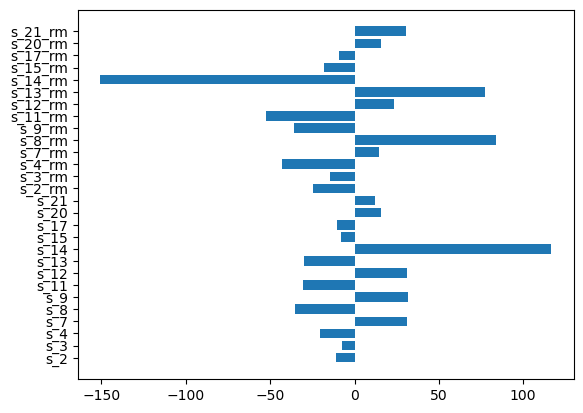

In [68]:
#BEST FEATURE FOR LINEAR REGRESSION MODEL

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=X_train_tm_s, y=y_train_tm)
plt.barh(X_train_tm.columns, model.coef_)

<BarContainer object of 28 artists>

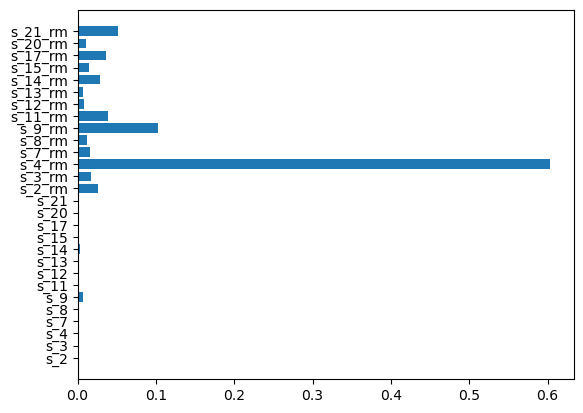

In [69]:
#BEST FEATURE FOR RF MODEL

rf.fit(X_train_tm_s, y_train_tm)
plt.barh(train_tm.columns, rf.feature_importances_)

In [71]:
# Creating new df

In [70]:
dftm= pd.concat([train['unit_number'],train_tm,train['RUL']],axis=1)
dftm

unit_number     s_2      s_3      s_4     s_7      s_8      s_9   s_11  \
0                1  641.82  1589.70  1400.60  554.36  2388.06  9046.19  47.47   
1                1  642.15  1591.82  1403.14  553.75  2388.04  9044.07  47.49   
2                1  642.35  1587.99  1404.20  554.26  2388.08  9052.94  47.27   
3                1  642.35  1582.79  1401.87  554.45  2388.11  9049.48  47.13   
4                1  642.37  1582.85  1406.22  554.00  2388.06  9055.15  47.28   
...            ...     ...      ...      ...     ...      ...      ...    ...   
20626          100  643.49  1597.98  1428.63  551.43  2388.19  9065.52  48.07   
20627          100  643.54  1604.50  1433.58  550.86  2388.23  9065.11  48.04   
20628          100  643.42  1602.46  1428.18  550.94  2388.24  9065.90  48.09   
20629          100  643.23  1605.26  1426.53  550.68  2388.25  9073.72  48.39   
20630          100  643.85  1600.38  1432.14  550.79  2388.26  9061.48  48.20   

         s_12     s_13  ...    s_9_rm  s_11_rm  s_12_rm   s_13_rm   s_14_rm  \
0      521.66  2388.02  ...  9046.190   47.470  521.660  2388.020  8138.620   
1      522.28  2388.07  ...  9044.070   47.490  522.280  2388.070  8131.490   
2      522.42  2388.03  ...  9052.940   47.270  522.420  2388.030  8133.230   
3      522.86  2388.08  ...  9049.480   47.130  522.860  2388.080  8133.830   
4      522.19  2388.04  ...  9055.150   47.280  522.190  2388.040  8133.800   
...       ...      ...  ...       ...      ...      ...       ...       ...   
20626  519.49  2388.26  ...  9066.903   48.116  519.840  2388.237  8141.170   
20627  519.68  2388.22  ...  9066.820   48.116  519.793  2388.237  8140.771   
20628  520.01  2388.24  ...  9066.642   48.096  519.796  2388.240  8140.882   
20629  519.67  2388.23  ...  9067.045   48.136  519.813  2388.239  8140.833   
20630  519.30  2388.26  ...  9066.719   48.157  519.791  2388.239  8140.338   

       s_15_rm  s_17_rm  s_20_rm   s_21_rm  RUL  
0      8.41950    392.0   39.060  23.41900  191  
1      8.43180    392.0   39.000  23.42360  190  
2      8.41780    390.0   38.950  23.34420  189  
3      8.36820    392.0   38.880  23.37390  188  
4      8.42940    393.0   38.900  23.40440  187  
...        ...      ...      ...       ...  ...  
20626  8.51031    396.0   38.453  23.09254    4  
20627  8.51083    395.9   38.416  23.08540    3  
20628  8.51915    396.2   38.424  23.07321    2  
20629  8.52434    396.0   38.388  23.07370    1  
20630  8.52308    396.1   38.383  23.07289    0  

[20631 rows x 30 columns]

In [72]:
# Plotting New Features 

def plot_signal(df, sensor_name):
    plt.figure(figsize=(13,5))
    for i in df['unit_number'].unique():
        if (i % 10 == 0):  
            plt.plot('RUL', sensor_name, data=df[df['unit_number']==i].rolling(8).mean())

    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Useful Life')
    plt.show()

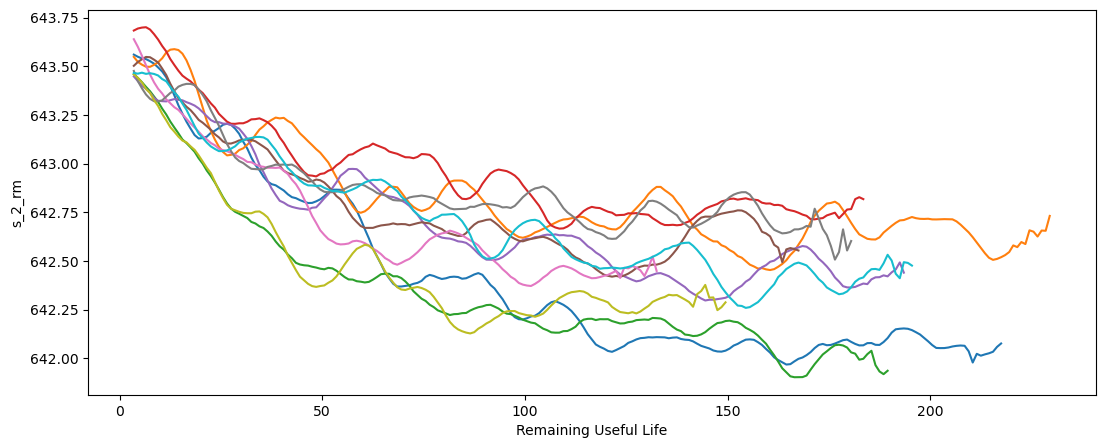

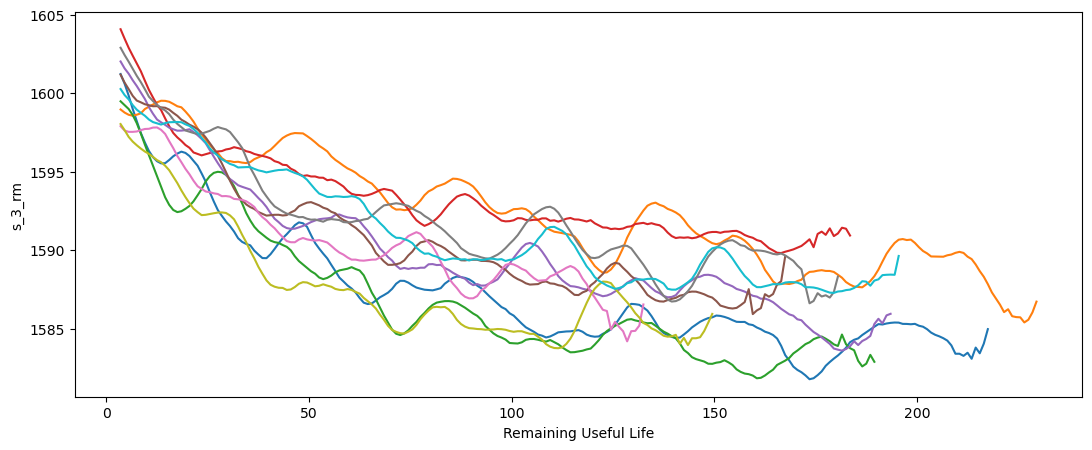

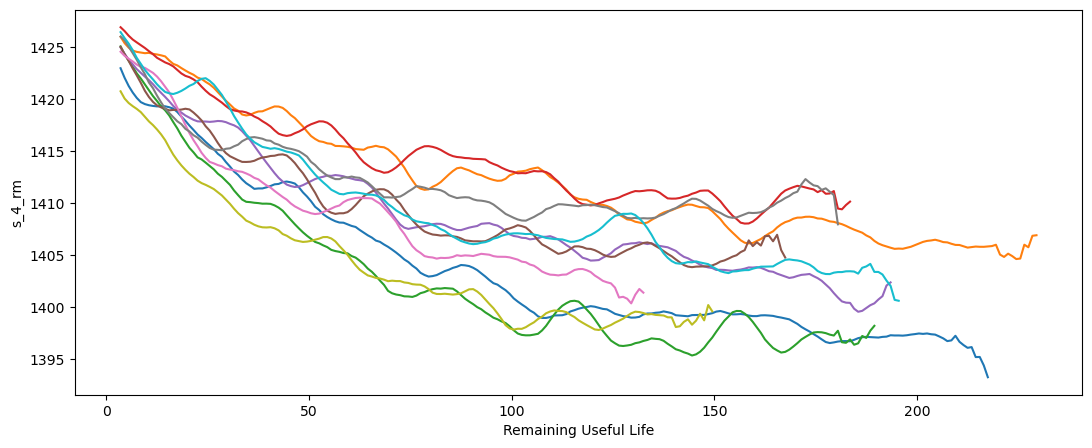

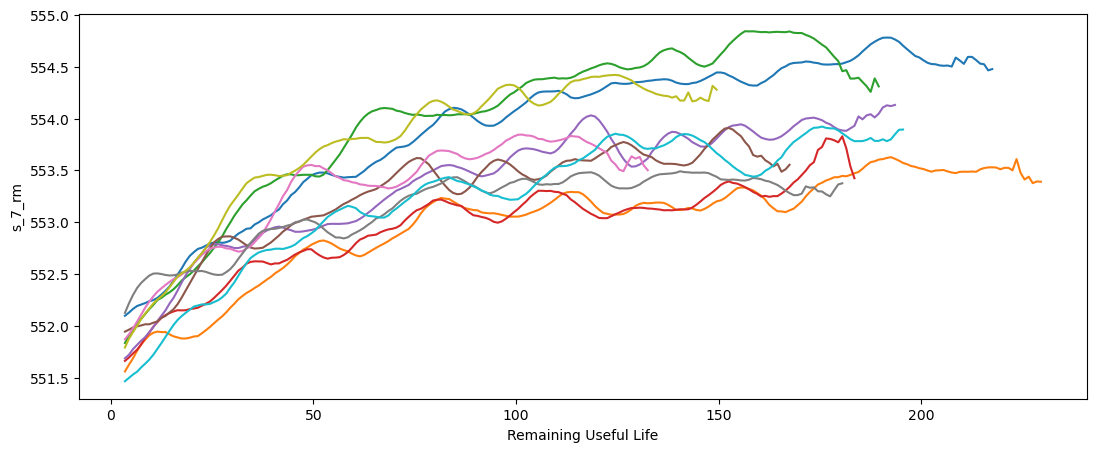

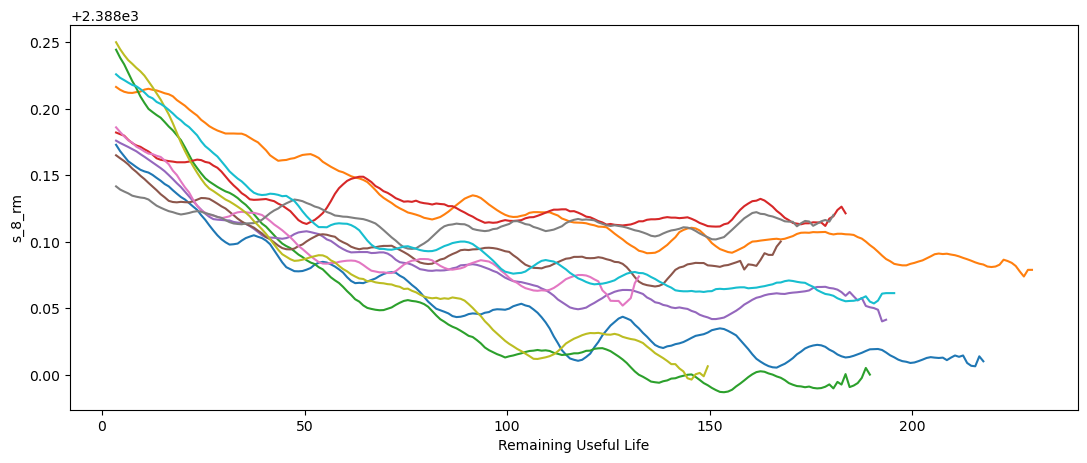

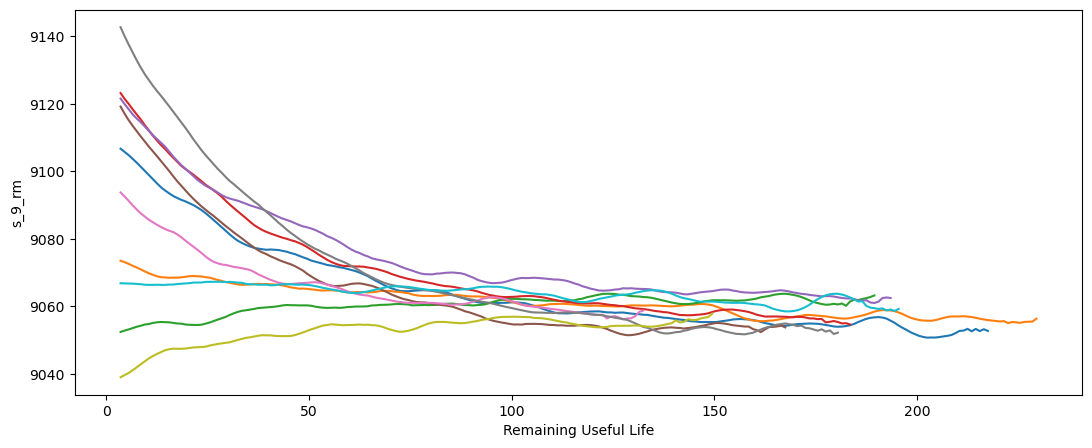

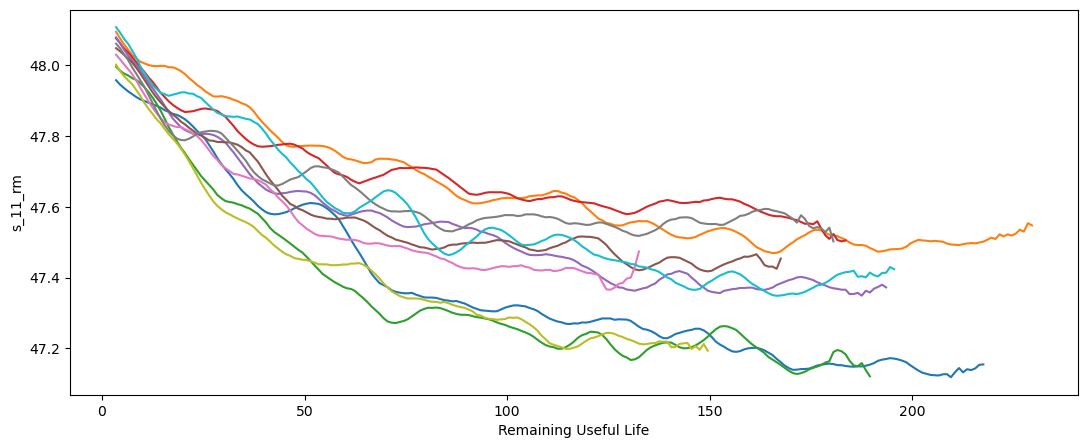

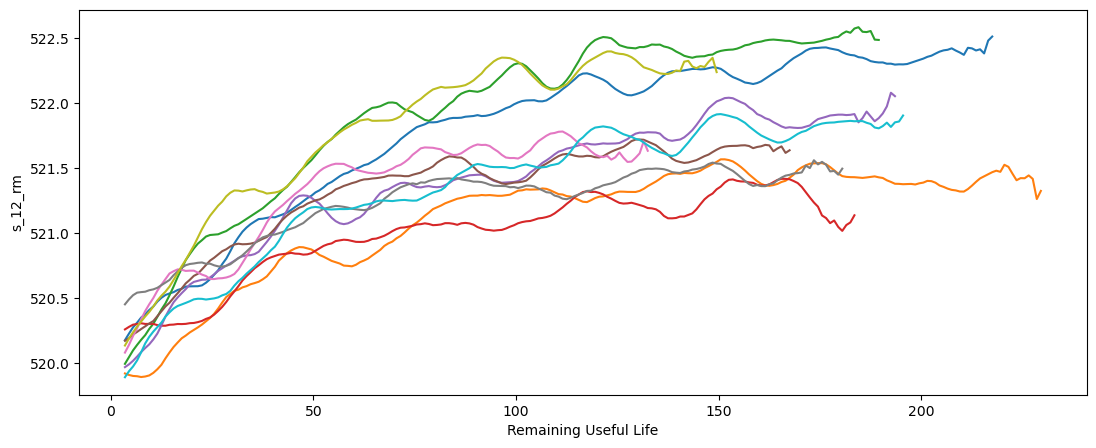

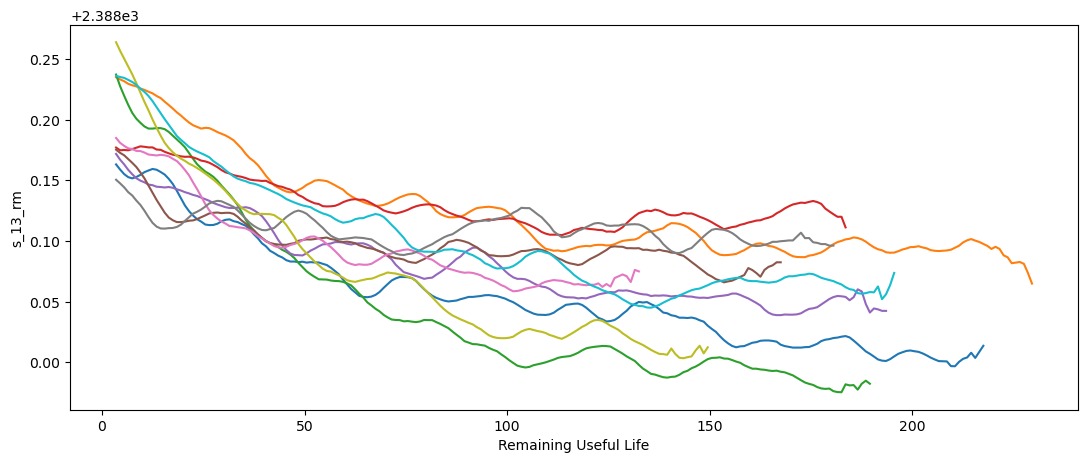

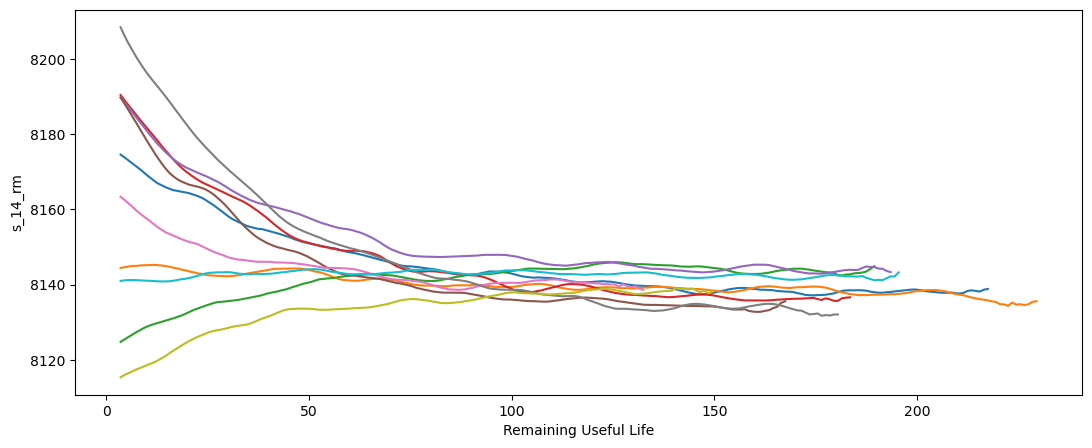

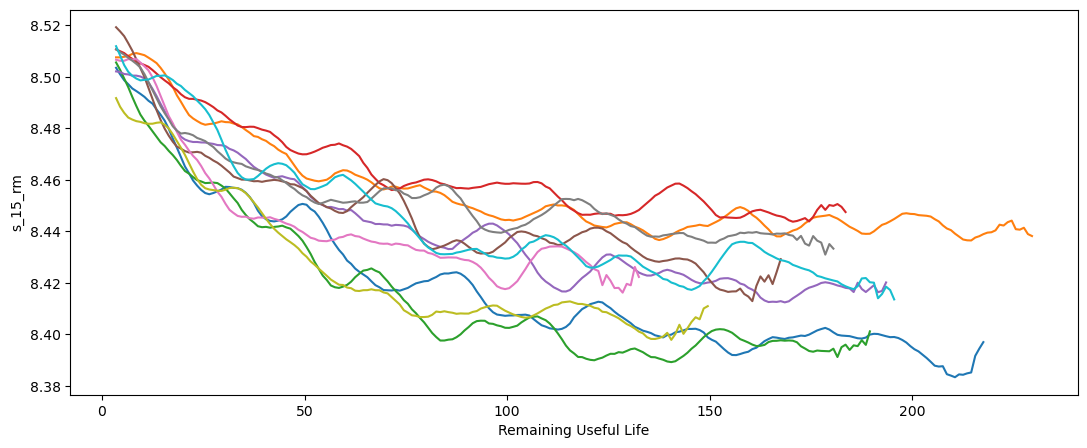

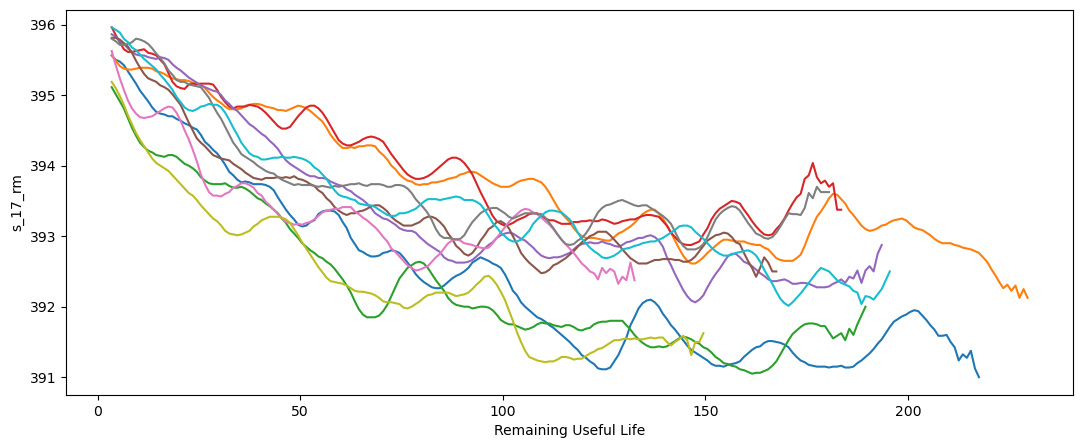

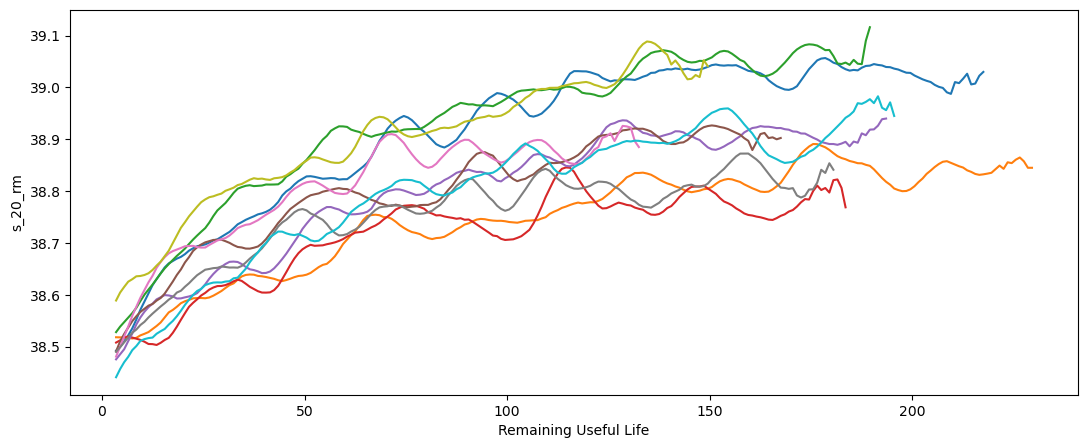

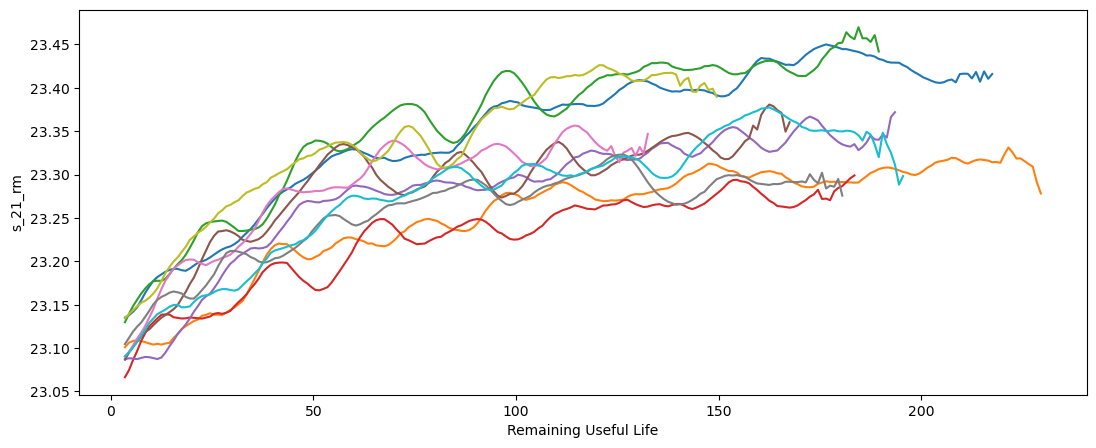

In [73]:
for i in range(1,22):
     if i not in [1,5,6,10,16,18,19] :
        try:
            plot_signal(dftm, 's_'+str(i)+'_rm')
        except:
            pass

In [74]:
#s9,s11,s12,and s7 have high significance in RUL

# DATA PREPARATION FOR CLASSIFICATION

In [75]:
y_train_tm

12276     30
8157      80
11666    103
12639    124
5278      30
        ... 
11284    107
11964    162
5390      74
860      195
15795    157
Name: RUL, Length: 13410, dtype: int64

In [76]:
label_map={1:"RISK ZONE",2:"MODERATED RISK",3:"NO RISK"}
y=[]

for i in dftm['RUL']:
    if i<=68:
        y.append(1)
    elif i>69 and i<=137:
        y.append(2)
    else:
        y.append(3)


In [77]:
X=dftm.drop(columns=['unit_number','RUL'])
Y=np.array(y)

In [78]:
X_train_tm_c, X_test_tm_c, y_train_tm_c, y_test_tm_c=train_test_split(X,Y,test_size=0.35, stratify=Y)
X_train_tm_cs=scaler.fit_transform(X_train_tm_c)
X_test_tm_cs=scaler.fit_transform(X_test_tm_c)

In [79]:
#Defining Evaluation Function

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true)))

In [80]:
#MODEL IMPLEMENTATION

from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=1)


In [81]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [82]:
#Model Evaluation
y_valid_c=[]
for k in y_valid['RUL']:
    if k<=68:
        y_valid_c.append(1)
    elif k>69 and k<=137:
        y_valid_c.append(2)
    else:
        y_valid_c.append(3)
        
y_valid_c=np.array(y_valid_c)

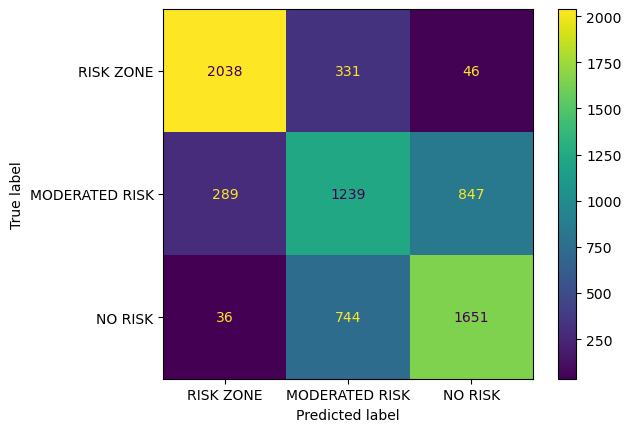

SVM
Accuracy score of training 0.688
Error rate of training 0.173
Accuracy score of test 0.682
Error rate of test 0.175
              precision    recall  f1-score   support

           1       0.86      0.84      0.85      2415
           2       0.54      0.52      0.53      2375
           3       0.65      0.68      0.66      2431

    accuracy                           0.68      7221
   macro avg       0.68      0.68      0.68      7221
weighted avg       0.68      0.68      0.68      7221



In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

classifier.fit(X_train_tm_cs,np.array(y_train_tm_c))
train_prediction=classifier.predict(X_train_tm_cs)

test_prediction=classifier.predict(X_test_tm_cs)


cm= confusion_matrix(y_test_tm_c, test_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[classifier.classes_[0]],label_map[classifier.classes_[1]],label_map[classifier.classes_[2]]])
disp.plot()
plt.show()

# Measure the performance
print('SVM')
print("Accuracy score of training %.3f" %metrics.accuracy_score(y_train_tm_c, train_prediction))
print("Error rate of training %.3f" %mean_absolute_percentage_error(y_train_tm_c,train_prediction))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test_tm_c, test_prediction))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test_tm_c,test_prediction))
print(metrics.classification_report(y_test_tm_c,test_prediction))

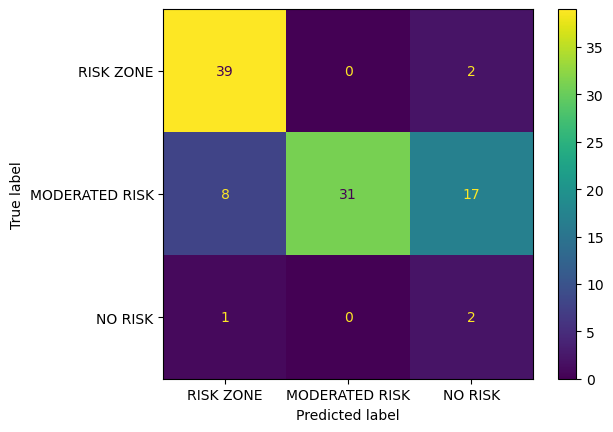

SVM
Accuracy score of validation 0.720
Error rate of validation 0.172


In [84]:
y_svc_valid=classifier.predict(X_valid_s)
cm= confusion_matrix(y_valid_c, y_svc_valid, labels=classifier.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[classifier.classes_[0]],label_map[classifier.classes_[1]],label_map[classifier.classes_[2]]])
disp.plot()
plt.show()
print('SVM')
print("Accuracy score of validation %.3f" %metrics.accuracy_score(y_valid_c,  y_svc_valid))
print("Error rate of validation %.3f" %mean_absolute_percentage_error(y_valid_c, y_svc_valid))

In [85]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=5)

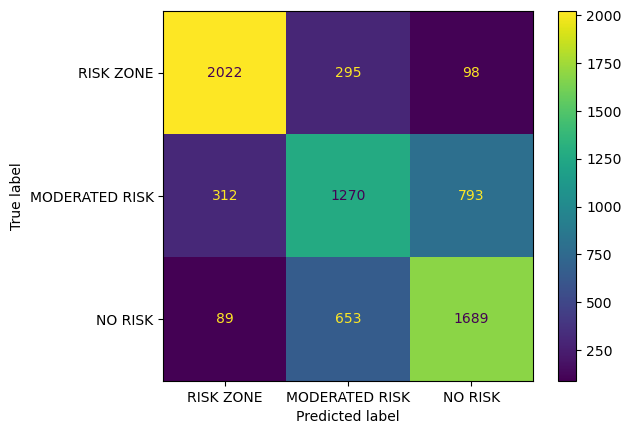

Random Forest Classifier
Accuracy score of train 0.976
Error rate of train 0.013
Accuracy score of test 0.690
Error rate of test 0.183
              precision    recall  f1-score   support

           1       0.83      0.84      0.84      2415
           2       0.57      0.53      0.55      2375
           3       0.65      0.69      0.67      2431

    accuracy                           0.69      7221
   macro avg       0.69      0.69      0.69      7221
weighted avg       0.69      0.69      0.69      7221



In [86]:
clf.fit(X_train_tm_cs,np.array(y_train_tm_c))
y_rfc_train=clf.predict(X_train_tm_cs)
y_rfc_test=clf.predict(X_test_tm_cs)
cm= confusion_matrix(y_test_tm_c, y_rfc_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[clf.classes_[0]],label_map[clf.classes_[1]],label_map[clf.classes_[2]]])
disp.plot()
plt.show()

# Measure the performance
print('Random Forest Classifier')
print("Accuracy score of train %.3f" %metrics.accuracy_score(y_train_tm_c, y_rfc_train))
print("Error rate of train %.3f" %mean_absolute_percentage_error(y_train_tm_c,y_rfc_train))

print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test_tm_c, y_rfc_test))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test_tm_c,y_rfc_test))

print(metrics.classification_report(y_test_tm_c,y_rfc_test))

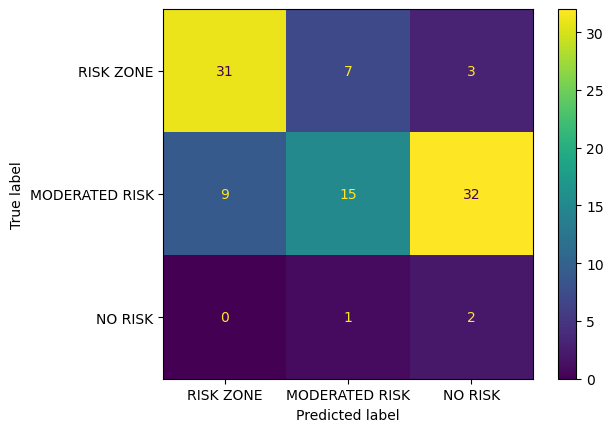

Random Forest Classifier
Accuracy score of validation 0.480
Error rate of validation 0.338
              precision    recall  f1-score   support

           1       0.78      0.76      0.77        41
           2       0.65      0.27      0.38        56
           3       0.05      0.67      0.10         3

    accuracy                           0.48       100
   macro avg       0.49      0.56      0.42       100
weighted avg       0.68      0.48      0.53       100



In [87]:
y_rfc_valid=clf.predict(X_valid_s)
cm= confusion_matrix(y_valid_c, y_rfc_valid, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[clf.classes_[0]],label_map[clf.classes_[1]],label_map[clf.classes_[2]]])
disp.plot()
plt.show()
print('Random Forest Classifier')
print("Accuracy score of validation %.3f" %metrics.accuracy_score(y_valid_c, y_rfc_valid))
print("Error rate of validation %.3f" %mean_absolute_percentage_error(y_valid_c,y_rfc_valid))
print(metrics.classification_report(y_valid_c,y_rfc_valid))

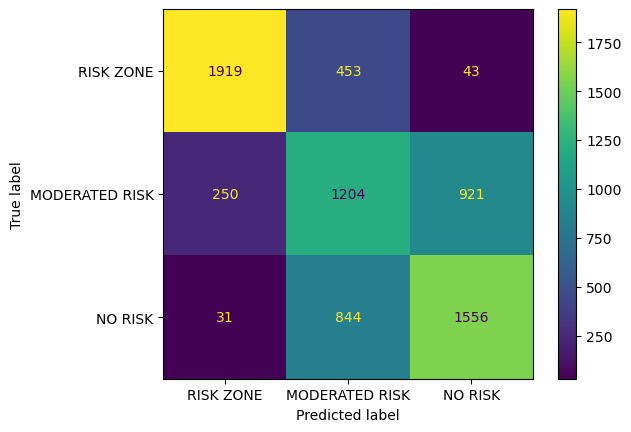

Guassian Naive Bayes
Accuracy score of train 0.636
Error rate of train 0.198
Accuracy score of test 0.648
Error rate of test 0.198
              precision    recall  f1-score   support

           1       0.87      0.79      0.83      2415
           2       0.48      0.51      0.49      2375
           3       0.62      0.64      0.63      2431

    accuracy                           0.65      7221
   macro avg       0.66      0.65      0.65      7221
weighted avg       0.66      0.65      0.65      7221



In [88]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_tm_cs,np.array(y_train_tm_c))

y_gnb_test= gnb.predict(X_test_tm_cs)
y_gnb_train= gnb.predict(X_train_tm_cs)


cm= confusion_matrix(y_test_tm_c, y_gnb_test, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[gnb.classes_[0]],label_map[gnb.classes_[1]],label_map[gnb.classes_[2]]])
disp.plot()
plt.show()

# Measure the performance
print('Guassian Naive Bayes')
print("Accuracy score of train %.3f" %metrics.accuracy_score(y_train_tm_c, y_gnb_train))
print("Error rate of train %.3f" %mean_absolute_percentage_error(y_train_tm_c,y_gnb_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test_tm_c, y_gnb_test))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test_tm_c,y_gnb_test))

print(metrics.classification_report(y_test_tm_c,y_gnb_test))

# Running Cross Validation on SVC (the best model so far)

In [89]:
def cross_validation(d):
    y=[]
    for k in d:
        if k<=68:
            y.append(1)
        elif k>69 and k<=137:
            y.append(2)
        else:
            y.append(3)
    return y

Index du train :  [    0     1     2 ... 20627 20628 20629] 

Index de test :  [   15    18    25 ... 20606 20615 20630]


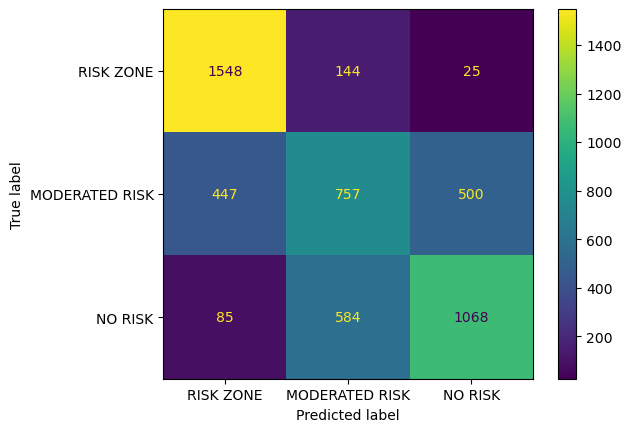

SVM
Accuracy score of training 0.689
Error rate of training 0.174
Accuracy score of test 0.654
Error rate of test 0.178
              precision    recall  f1-score   support

           1       0.74      0.90      0.82      1717
           2       0.51      0.44      0.47      1704
           3       0.67      0.61      0.64      1737

    accuracy                           0.65      5158
   macro avg       0.64      0.65      0.64      5158
weighted avg       0.64      0.65      0.64      5158

Index du train :  [    0     2    11 ... 20628 20629 20630] 

Index de test :  [    1     3     4 ... 20623 20626 20627]


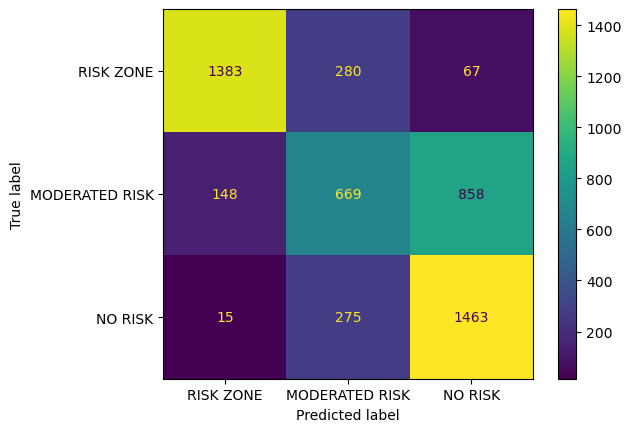

SVM
Accuracy score of training 0.690
Error rate of training 0.173
Accuracy score of test 0.681
Error rate of test 0.197
              precision    recall  f1-score   support

           1       0.89      0.80      0.84      1730
           2       0.55      0.40      0.46      1675
           3       0.61      0.83      0.71      1753

    accuracy                           0.68      5158
   macro avg       0.68      0.68      0.67      5158
weighted avg       0.69      0.68      0.67      5158

Index du train :  [    0     1     2 ... 20627 20629 20630] 

Index de test :  [   12    17    19 ... 20618 20625 20628]


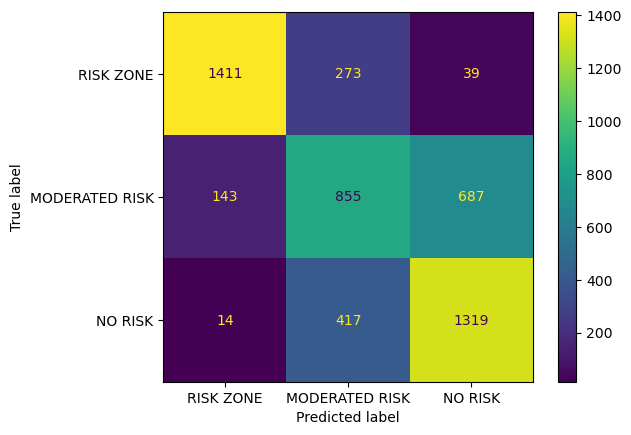

SVM
Accuracy score of training 0.685
Error rate of training 0.177
Accuracy score of test 0.695
Error rate of test 0.177
              precision    recall  f1-score   support

           1       0.90      0.82      0.86      1723
           2       0.55      0.51      0.53      1685
           3       0.64      0.75      0.70      1750

    accuracy                           0.70      5158
   macro avg       0.70      0.69      0.69      5158
weighted avg       0.70      0.70      0.70      5158

Index du train :  [    1     3     4 ... 20627 20628 20630] 

Index de test :  [    0     2    11 ... 20620 20624 20629]


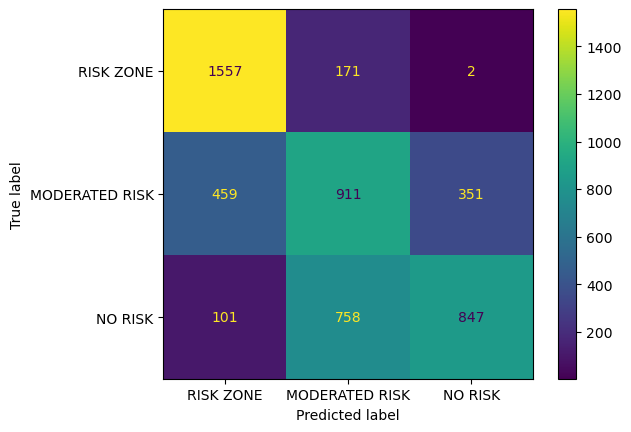

SVM
Accuracy score of training 0.690
Error rate of training 0.174
Accuracy score of test 0.643
Error rate of test 0.175
              precision    recall  f1-score   support

           1       0.74      0.90      0.81      1730
           2       0.50      0.53      0.51      1721
           3       0.71      0.50      0.58      1706

    accuracy                           0.64      5157
   macro avg       0.65      0.64      0.63      5157
weighted avg       0.65      0.64      0.64      5157



In [91]:
from sklearn.model_selection import KFold
train_tm_cv=dftm.drop(columns=['unit_number','RUL']).copy()
y=dftm['RUL']
cv = KFold(n_splits=4, shuffle=True)
for train_index, test_index in cv.split(train_tm) :
    print("Index du train : ", train_index, "\n")
    print("Index de test : ", test_index)
    X_train, X_test, y_train, y_test = train_tm_cv.iloc[train_index,:], train_tm_cv.iloc[test_index,:],np.array(cross_validation(y[train_index])), np.array(cross_validation(y[test_index]))
    classifier.fit(scaler.fit_transform(X_train), y_train)
    y_svc_train=classifier.predict(scaler.fit_transform(X_train))

    y_svc_test=classifier.predict(scaler.fit_transform(X_test))


    cm= confusion_matrix(y_test, y_svc_test,)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[classifier.classes_[0]],label_map[classifier.classes_[1]],label_map[classifier.classes_[2]]])
    disp.plot()
    plt.show()

    # Measure the performance
    print('SVM')
    print("Accuracy score of training %.3f" %metrics.accuracy_score(y_train, y_svc_train))
    print("Error rate of training %.3f" %mean_absolute_percentage_error(y_train,y_svc_train))
    print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test, y_svc_test))
    print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test,y_svc_test))
    print(metrics.classification_report(y_test,y_svc_test))